In [1]:
#!pip install python-dotenv



In [2]:
#!pip install vaderSentiment

In [3]:
import pandas as pd
import os
from dotenv import load_dotenv
import json
import re
import requests
from extract_reddit_data import RedditAPI
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer






/Users/aryasmc/.local/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
[nltk_data] Downloading package punkt to /Users/aryasmc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aryasmc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
# Extra packages
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis.gensim_models as gensimvis
import gensim


import pyLDAvis

from gensim.models.coherencemodel import CoherenceModel   # Compare the coherence of topics generated by NMF, LSA, and LDA


In [5]:
#!pip install pyLDAvis==3.4.1 --user


In [6]:
from extract_reddit_data import RedditAPI

In [7]:
reddit_api = RedditAPI()
cryptocurrency = reddit_api.get_crypto_curr_data()
cryptomarkets = reddit_api.get_crypto_markets_data()
bitcoin = reddit_api.get_bitcoin_data()
eth= reddit_api.get_eth_data()
binance = reddit_api.get_binance_data()
solana = reddit_api.get_solana_data()
ripple = reddit_api.get_ripple_data()
cardano = reddit_api.get_cardano_data()
tronix = reddit_api.get_tronix_data()
chainlink = reddit_api.get_chainlink_data()

## understand the Databases 


In [8]:
def print_dataframe_shape(df, name):
    rows, columns = df.shape
    print(f"{name} database has {rows} rows and {columns} columns.")

print_dataframe_shape(cryptocurrency, "Cryptocurrency")
print_dataframe_shape(cryptomarkets, "Crypto Markets")
print_dataframe_shape(bitcoin, "Bitcoin")
print_dataframe_shape(eth, "Ethereum")
print_dataframe_shape(binance, "Binance")
print_dataframe_shape(solana, "Solana")
print_dataframe_shape(ripple, "Ripple")
print_dataframe_shape(cardano, "Cardano")
print_dataframe_shape(tronix, "Tronix")
print_dataframe_shape(chainlink, "Chainlink")

Cryptocurrency database has 102 rows and 9 columns.
Crypto Markets database has 101 rows and 9 columns.
Bitcoin database has 102 rows and 9 columns.
Ethereum database has 100 rows and 9 columns.
Binance database has 101 rows and 9 columns.
Solana database has 101 rows and 9 columns.
Ripple database has 102 rows and 9 columns.
Cardano database has 102 rows and 9 columns.
Tronix database has 100 rows and 9 columns.
Chainlink database has 100 rows and 9 columns.


In [9]:
def dataframe_description(df, name):
    print(f"{name} description:")
    info = df.describe()
    return info

# Print description for each DataFrame
print(dataframe_description(cryptocurrency, "Cryptocurrency"))
print(dataframe_description(cryptomarkets, "Crypto Markets"))
print(dataframe_description(bitcoin, "Bitcoin"))
print(dataframe_description(eth, "Ethereum"))
print(dataframe_description(binance, "Binance"))
print(dataframe_description(solana, "Solana"))
print(dataframe_description(ripple, "Ripple"))
print(dataframe_description(cardano, "Cardano"))
print(dataframe_description(tronix, "Tronix"))
print(dataframe_description(chainlink, "Chainlink"))

Cryptocurrency description:
       upvote_ratio         ups  downs       score
count    102.000000  102.000000  102.0  102.000000
mean       0.633333   81.598039    0.0   81.598039
std        0.231958  161.540374    0.0  161.540374
min        0.100000    0.000000    0.0    0.000000
25%        0.462500    0.000000    0.0    0.000000
50%        0.695000   16.000000    0.0   16.000000
75%        0.830000   72.750000    0.0   72.750000
max        1.000000  833.000000    0.0  833.000000
Crypto Markets description:
       upvote_ratio         ups  downs       score
count    101.000000  101.000000  101.0  101.000000
mean       0.724158    3.851485    0.0    3.851485
std        0.266643    8.235759    0.0    8.235759
min        0.130000    0.000000    0.0    0.000000
25%        0.500000    0.000000    0.0    0.000000
50%        0.800000    2.000000    0.0    2.000000
75%        1.000000    4.000000    0.0    4.000000
max        1.000000   59.000000    0.0   59.000000
Bitcoin description:
     

In [10]:
def missing_values(df, name):
    print(f"{name} number of missing values:")
    missing_values = df.isna().sum()
    print(missing_values)
    return missing_values

# Checking missing values for each DataFrame
print(missing_values(cryptocurrency, "Cryptocurrency"))
print(missing_values(cryptomarkets, "Crypto Markets"))
print(missing_values(bitcoin, "Bitcoin"))
print(missing_values(eth, "Ethereum"))
print(missing_values(binance, "Binance"))
print(missing_values(solana, "Solana"))
print(missing_values(ripple, "Ripple"))
print(missing_values(cardano, "Cardano"))
print(missing_values(tronix, "Tronix"))
print(missing_values(chainlink, "Chainlink"))

Cryptocurrency number of missing values:
approved_date    102
thread_id          0
subreddit          0
title              0
body               0
upvote_ratio       0
ups                0
downs              0
score              0
dtype: int64
approved_date    102
thread_id          0
subreddit          0
title              0
body               0
upvote_ratio       0
ups                0
downs              0
score              0
dtype: int64
Crypto Markets number of missing values:
approved_date    101
thread_id          0
subreddit          0
title              0
body               0
upvote_ratio       0
ups                0
downs              0
score              0
dtype: int64
approved_date    101
thread_id          0
subreddit          0
title              0
body               0
upvote_ratio       0
ups                0
downs              0
score              0
dtype: int64
Bitcoin number of missing values:
approved_date    102
thread_id          0
subreddit          0
title        

In [11]:
def clean_body_column(df, name):
    print(f"Cleaning 'body' column for {name} database.")
    # Replace empty strings with NaN
    df['body'].replace('', np.nan, inplace=True)
    # Drop rows with NaN values in the 'body' column
    df.dropna(subset=['body'], inplace=True)
    print(f"Number of rows after cleaning: {len(df)}")
    return df

# Cleaning 'body' column for each DataFrame
cryptocurrency = clean_body_column(cryptocurrency, "Cryptocurrency")
cryptomarkets = clean_body_column(cryptomarkets, "Crypto Markets")
bitcoin = clean_body_column(bitcoin, "Bitcoin")
eth = clean_body_column(eth, "Ethereum")
binance = clean_body_column(binance, "Binance")
solana = clean_body_column(solana, "Solana")
ripple = clean_body_column(ripple, "Ripple")
cardano = clean_body_column(cardano, "Cardano")
tronix = clean_body_column(tronix, "Tronix")
chainlink = clean_body_column(chainlink, "Chainlink")

Cleaning 'body' column for Cryptocurrency database.
Number of rows after cleaning: 52
Cleaning 'body' column for Crypto Markets database.
Number of rows after cleaning: 36
Cleaning 'body' column for Bitcoin database.
Number of rows after cleaning: 64
Cleaning 'body' column for Ethereum database.
Number of rows after cleaning: 74
Cleaning 'body' column for Binance database.
Number of rows after cleaning: 84
Cleaning 'body' column for Solana database.
Number of rows after cleaning: 89
Cleaning 'body' column for Ripple database.
Number of rows after cleaning: 91
Cleaning 'body' column for Cardano database.
Number of rows after cleaning: 53
Cleaning 'body' column for Tronix database.
Number of rows after cleaning: 75
Cleaning 'body' column for Chainlink database.
Number of rows after cleaning: 64


/var/folders/hm/_kmly7bs42gf5b9mpld3lp1r0000gn/T/ipykernel_96535/2515542157.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['body'].replace('', np.nan, inplace=True)
/var/folders/hm/_kmly7bs42gf5b9mpld3lp1r0000gn/T/ipykernel_96535/2515542157.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [12]:
def drop_approved_date_column(df, name):
    if 'approved_date' in df.columns:
        df = df.drop(columns=['approved_date'])
        print(f"'approved_date' column removed from {name} database.")
    else:
        print(f"No 'approved_date' column found in {name} database.")
    return df

# Dropping 'approved_date' column from each DataFrame
cryptocurrency = drop_approved_date_column(cryptocurrency, "Cryptocurrency")
cryptomarkets = drop_approved_date_column(cryptomarkets, "Crypto Markets")
bitcoin = drop_approved_date_column(bitcoin, "Bitcoin")
eth = drop_approved_date_column(eth, "Ethereum")
binance = drop_approved_date_column(binance, "Binance")
solana = drop_approved_date_column(solana, "Solana")
ripple = drop_approved_date_column(ripple, "Ripple")
cardano = drop_approved_date_column(cardano, "Cardano")
tronix = drop_approved_date_column(tronix, "Tronix")
chainlink = drop_approved_date_column(chainlink, "Chainlink")

'approved_date' column removed from Cryptocurrency database.
'approved_date' column removed from Crypto Markets database.
'approved_date' column removed from Bitcoin database.
'approved_date' column removed from Ethereum database.
'approved_date' column removed from Binance database.
'approved_date' column removed from Solana database.
'approved_date' column removed from Ripple database.
'approved_date' column removed from Cardano database.
'approved_date' column removed from Tronix database.
'approved_date' column removed from Chainlink database.


In [13]:
def duplicated_dataframe(df, name):
    duplicate = df.duplicated().sum()
    print(f"{name} has {duplicate} duplicate values.")

# Checking duplicate for each DataFrame
duplicated_dataframe(cryptocurrency, "Cryptocurrency")
duplicated_dataframe(cryptomarkets, "Crypto Markets")
duplicated_dataframe(bitcoin, "Bitcoin")
duplicated_dataframe(eth, "Ethereum")
duplicated_dataframe(binance, "Binance")
duplicated_dataframe(solana, "Solana")
duplicated_dataframe(ripple, "Ripple")
duplicated_dataframe(cardano, "Cardano")
duplicated_dataframe(tronix, "Tronix")
duplicated_dataframe(chainlink, "Chainlink")

Cryptocurrency has 0 duplicate values.
Crypto Markets has 0 duplicate values.
Bitcoin has 0 duplicate values.
Ethereum has 0 duplicate values.
Binance has 0 duplicate values.
Solana has 0 duplicate values.
Ripple has 0 duplicate values.
Cardano has 0 duplicate values.
Tronix has 0 duplicate values.
Chainlink has 0 duplicate values.


## Exploratory Data Analysis (EDA):

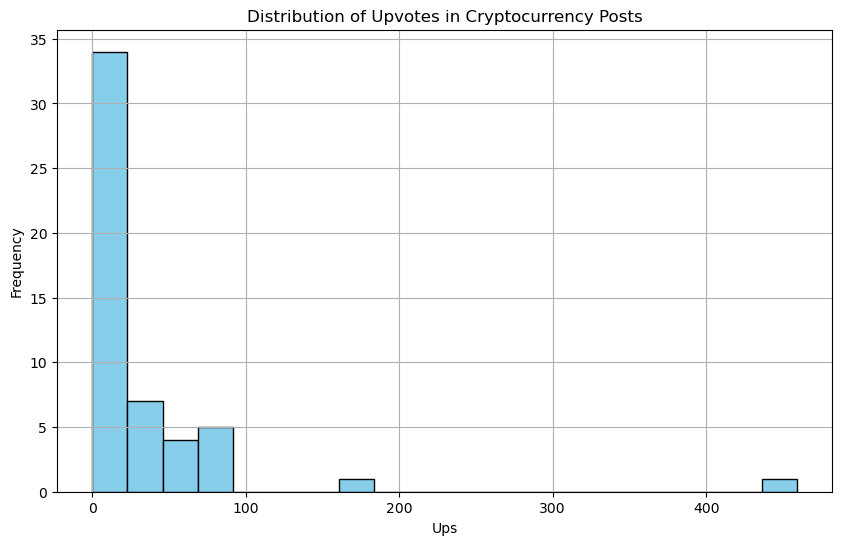

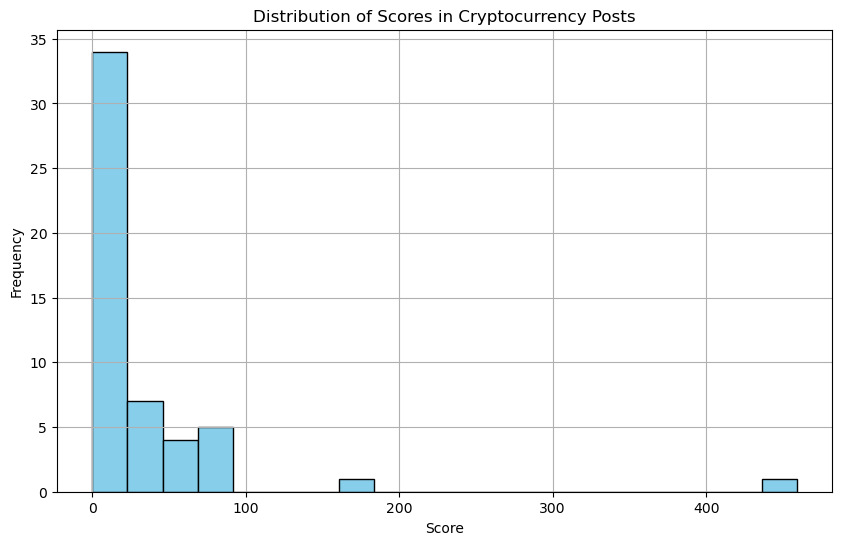

In [14]:
def plot_distribution(data, column, title):
    plt.figure(figsize=(10, 6))
    plt.hist(data[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel(column.capitalize())
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Plot distribution of upvotes and scores for each cryptocurrency
plot_distribution(cryptocurrency, 'ups', 'Distribution of Upvotes in Cryptocurrency Posts')
plot_distribution(cryptocurrency, 'score', 'Distribution of Scores in Cryptocurrency Posts')


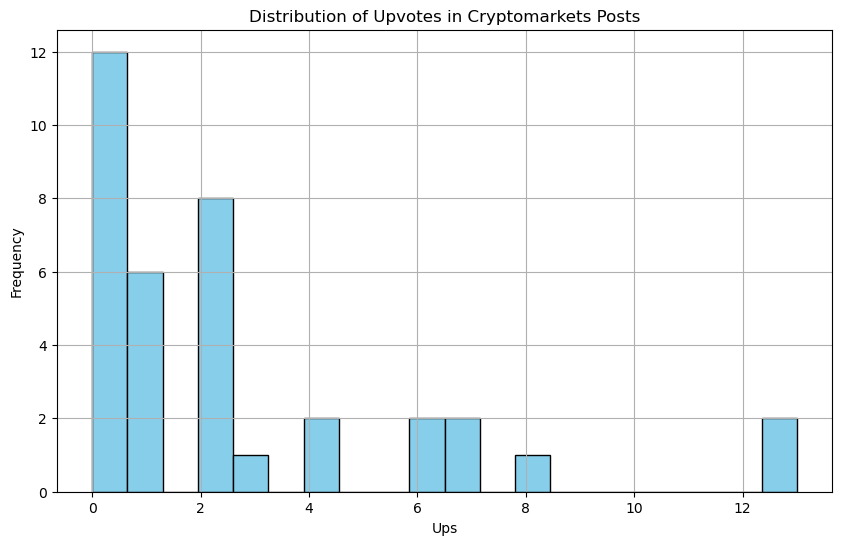

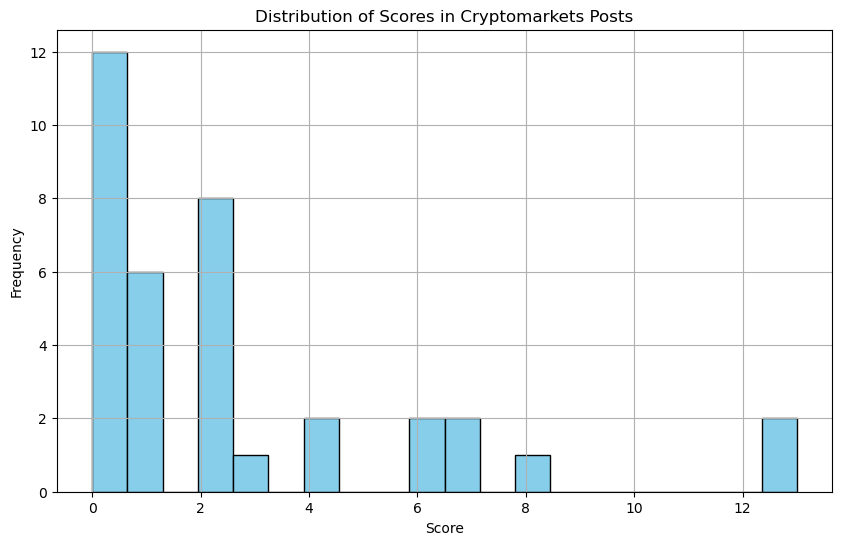

In [15]:
plot_distribution(cryptomarkets, 'ups', 'Distribution of Upvotes in Cryptomarkets Posts')
plot_distribution(cryptomarkets, 'score', 'Distribution of Scores in Cryptomarkets Posts')

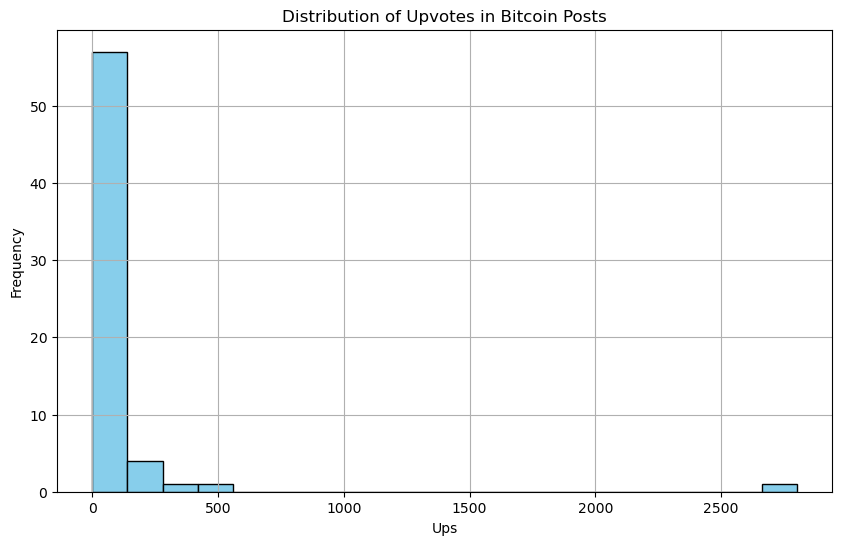

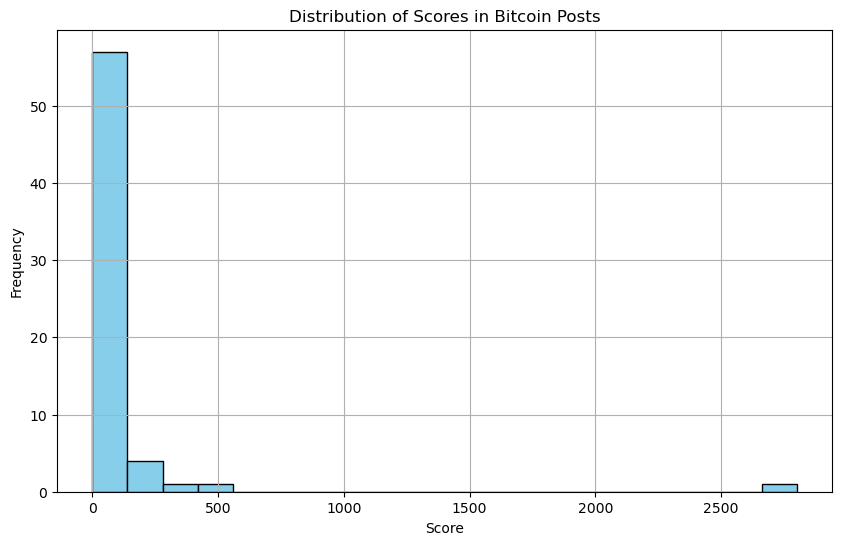

In [16]:
plot_distribution(bitcoin, 'ups', 'Distribution of Upvotes in Bitcoin Posts')
plot_distribution(bitcoin, 'score', 'Distribution of Scores in Bitcoin Posts')

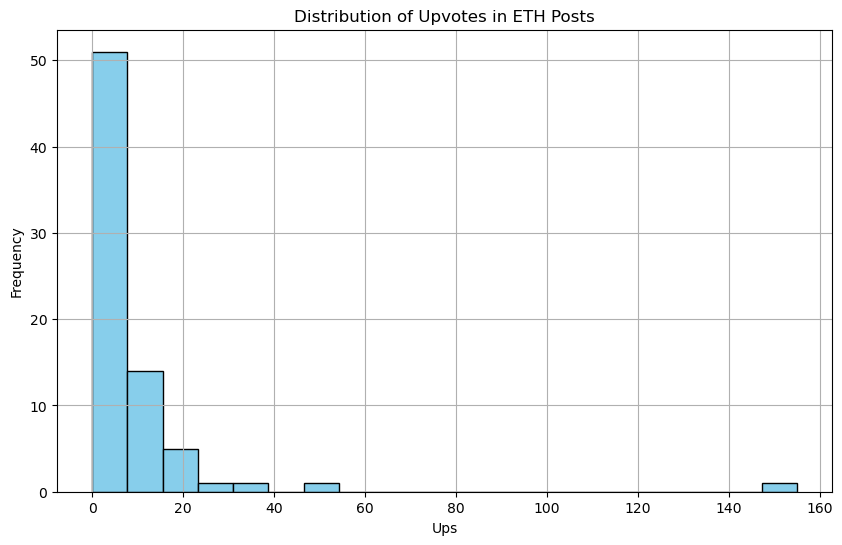

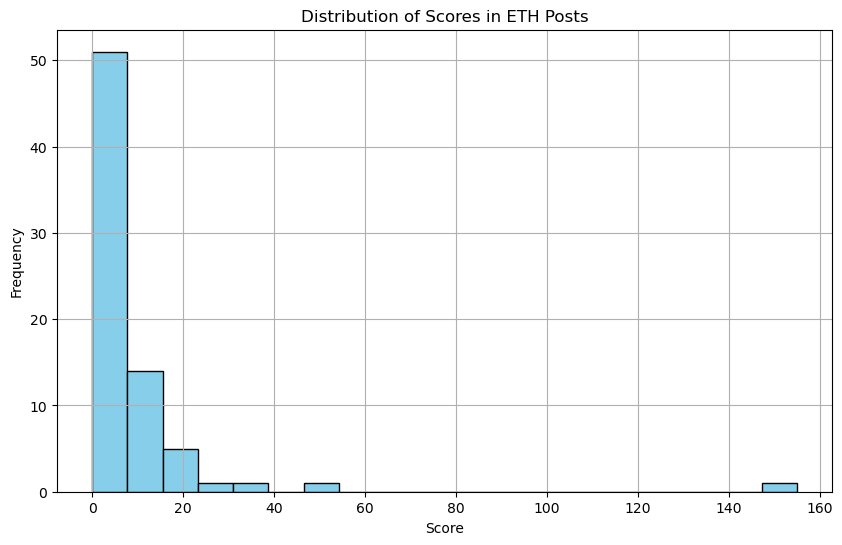

In [17]:
plot_distribution(eth, 'ups', 'Distribution of Upvotes in ETH Posts')
plot_distribution(eth, 'score', 'Distribution of Scores in ETH Posts')

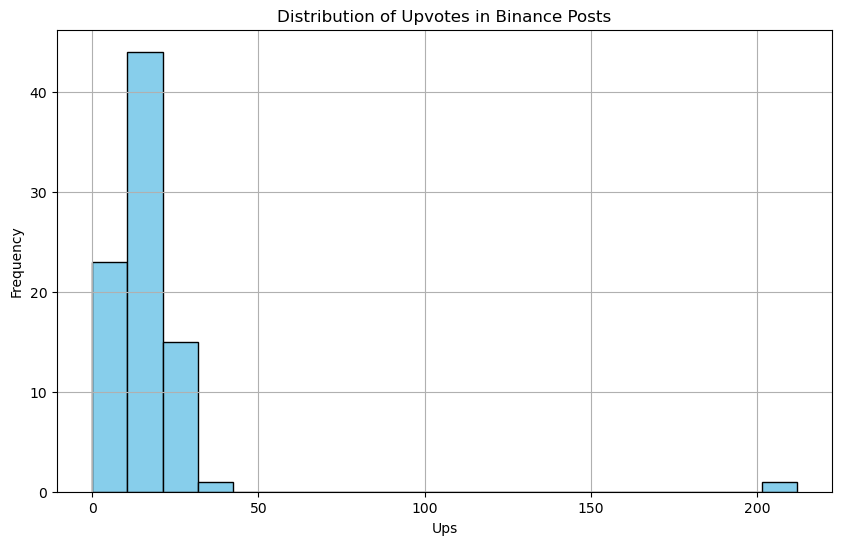

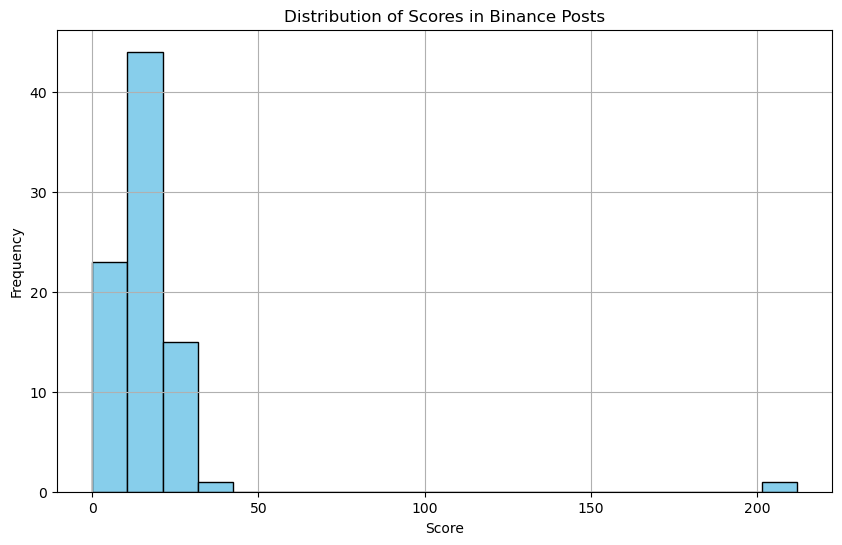

In [18]:
plot_distribution(binance, 'ups', 'Distribution of Upvotes in Binance Posts')
plot_distribution(binance, 'score', 'Distribution of Scores in Binance Posts')

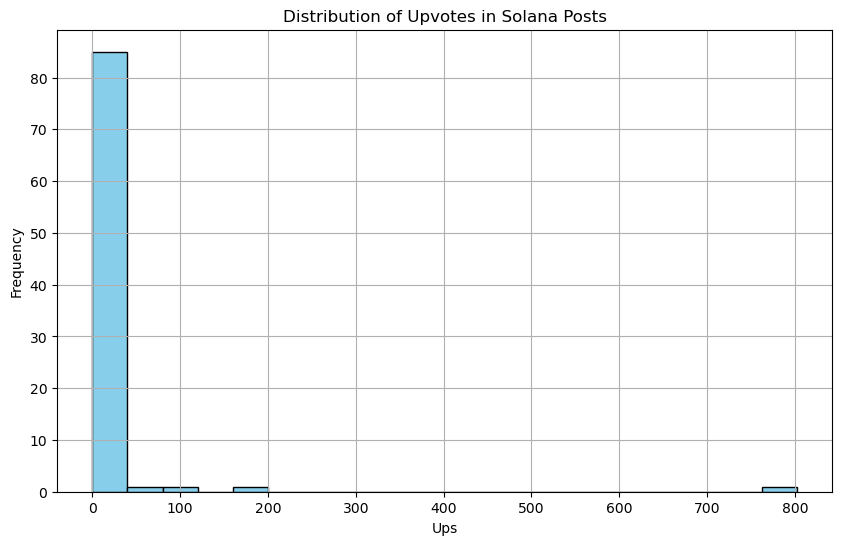

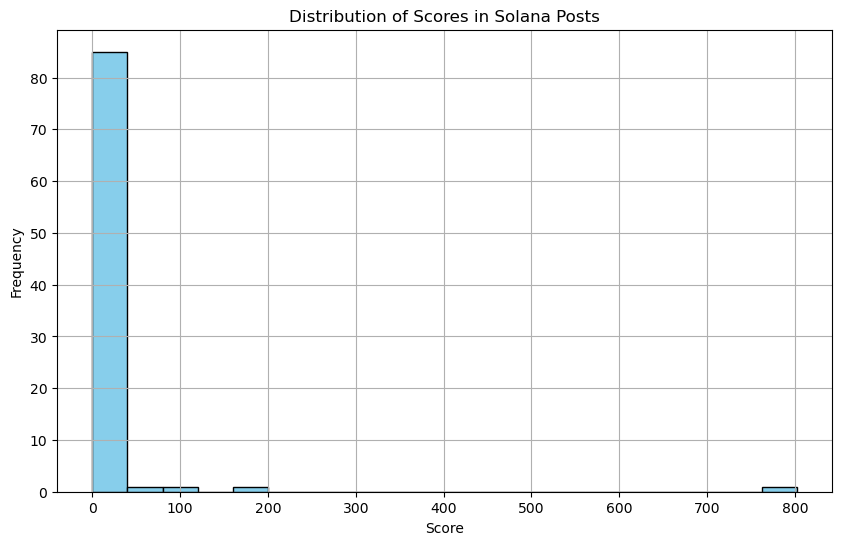

In [19]:
plot_distribution(solana, 'ups', 'Distribution of Upvotes in Solana Posts')
plot_distribution(solana, 'score', 'Distribution of Scores in Solana Posts')

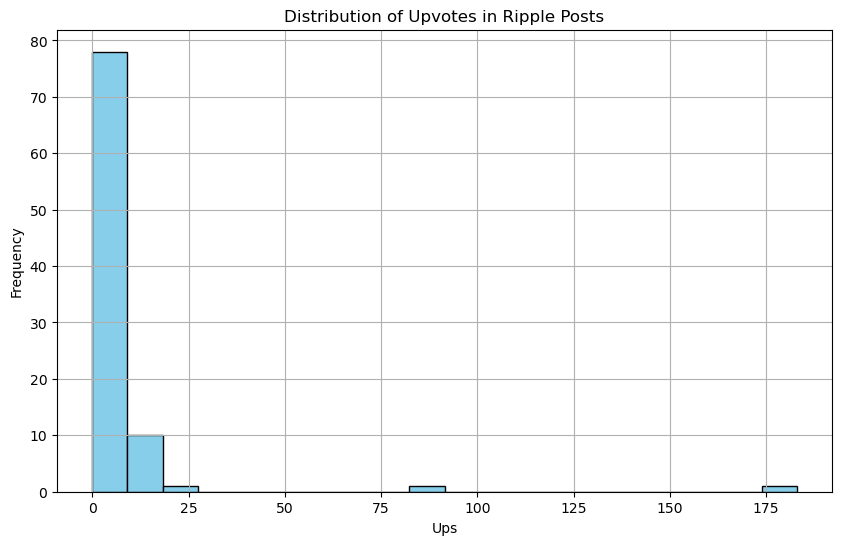

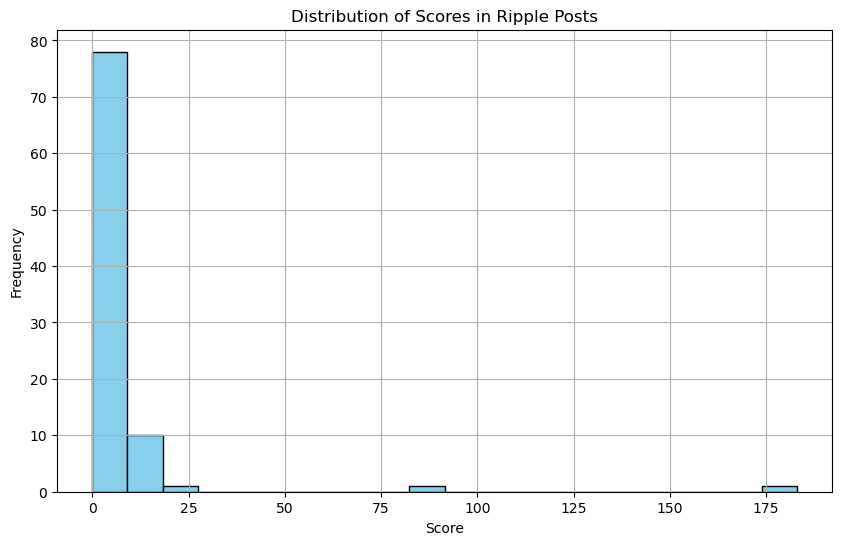

In [20]:

plot_distribution(ripple, 'ups', 'Distribution of Upvotes in Ripple Posts')
plot_distribution(ripple, 'score', 'Distribution of Scores in Ripple Posts')

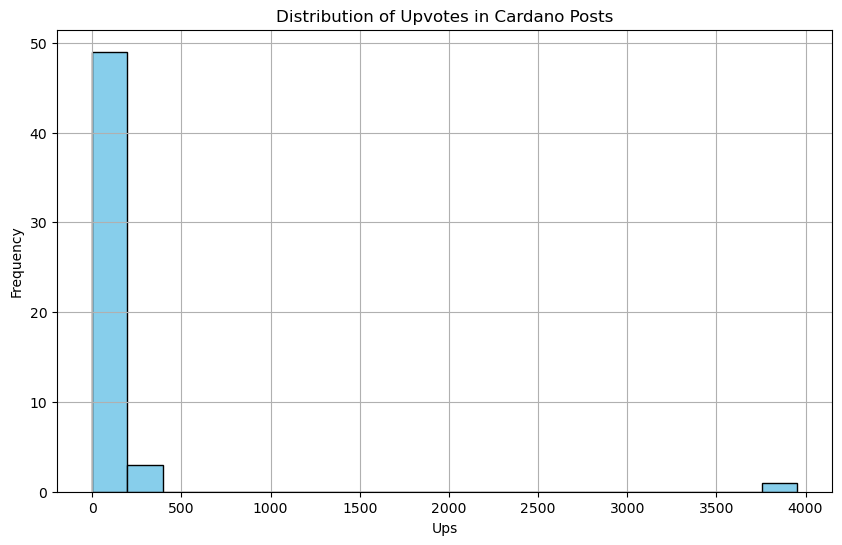

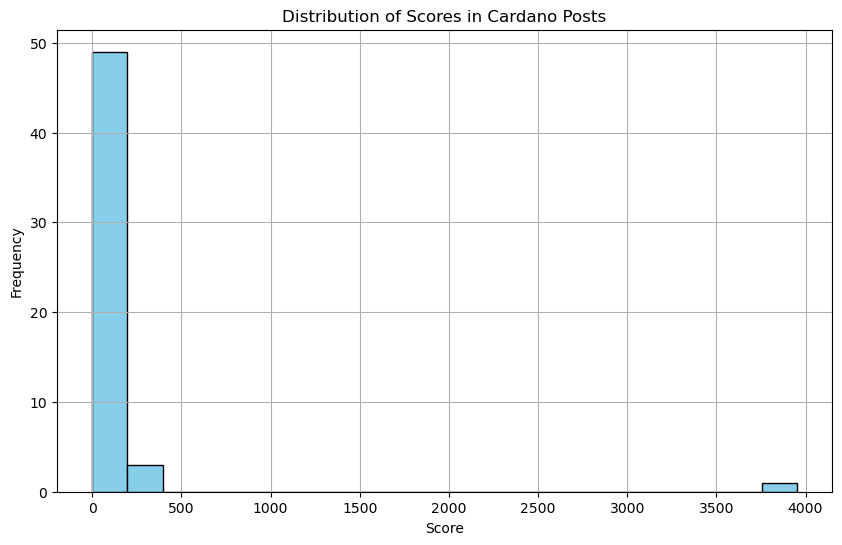

In [21]:
plot_distribution(cardano, 'ups', 'Distribution of Upvotes in Cardano Posts')
plot_distribution(cardano, 'score', 'Distribution of Scores in Cardano Posts')

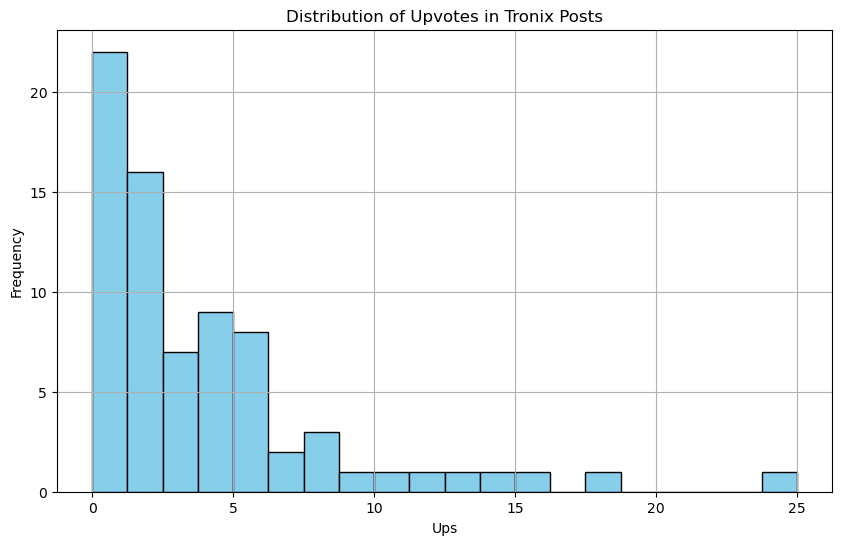

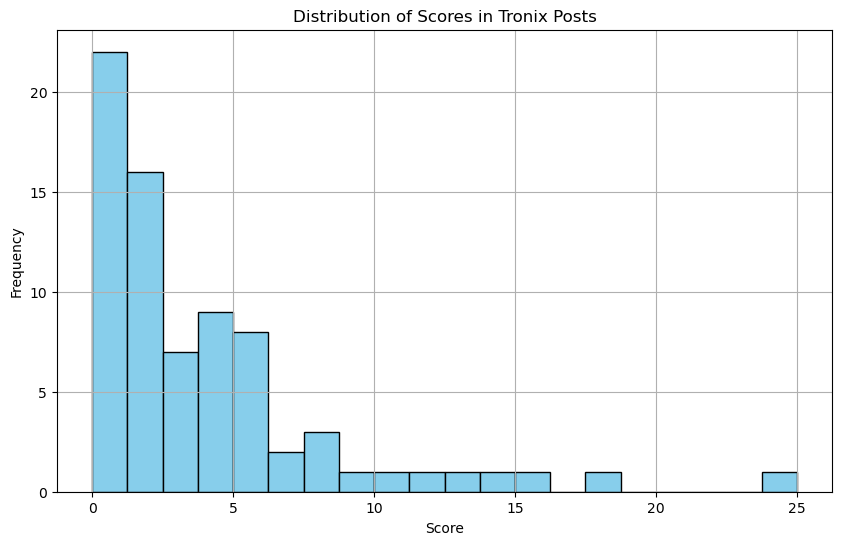

In [22]:
plot_distribution(tronix, 'ups', 'Distribution of Upvotes in Tronix Posts')
plot_distribution(tronix, 'score', 'Distribution of Scores in Tronix Posts')

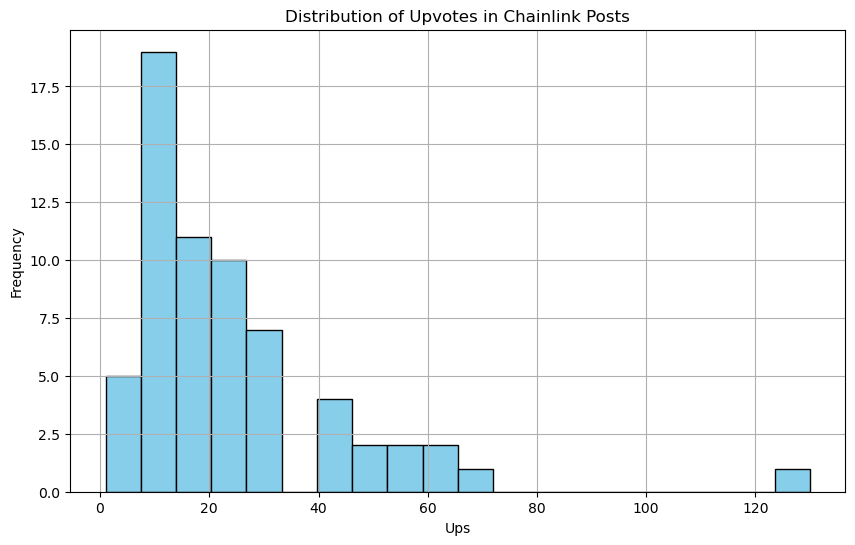

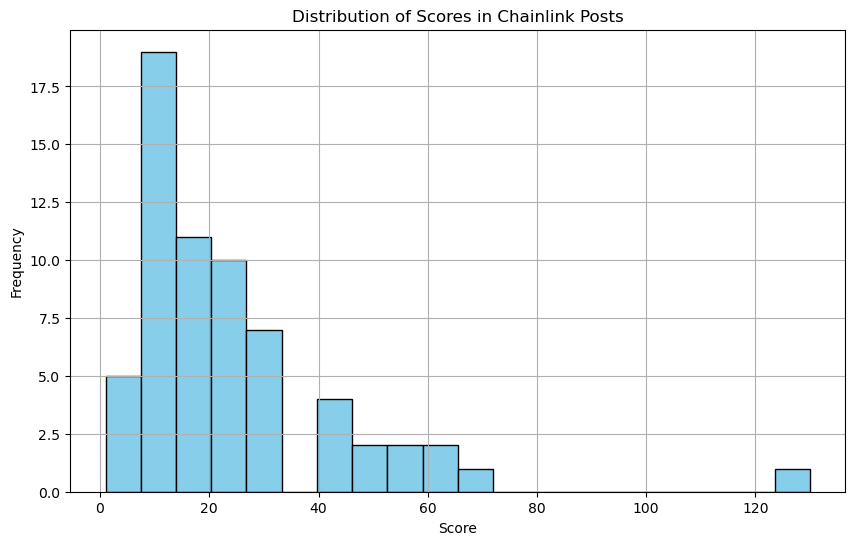

In [23]:
plot_distribution(chainlink, 'ups', 'Distribution of Upvotes in Chainlink Posts')
plot_distribution(chainlink, 'score', 'Distribution of Scores in Chainlink Posts')

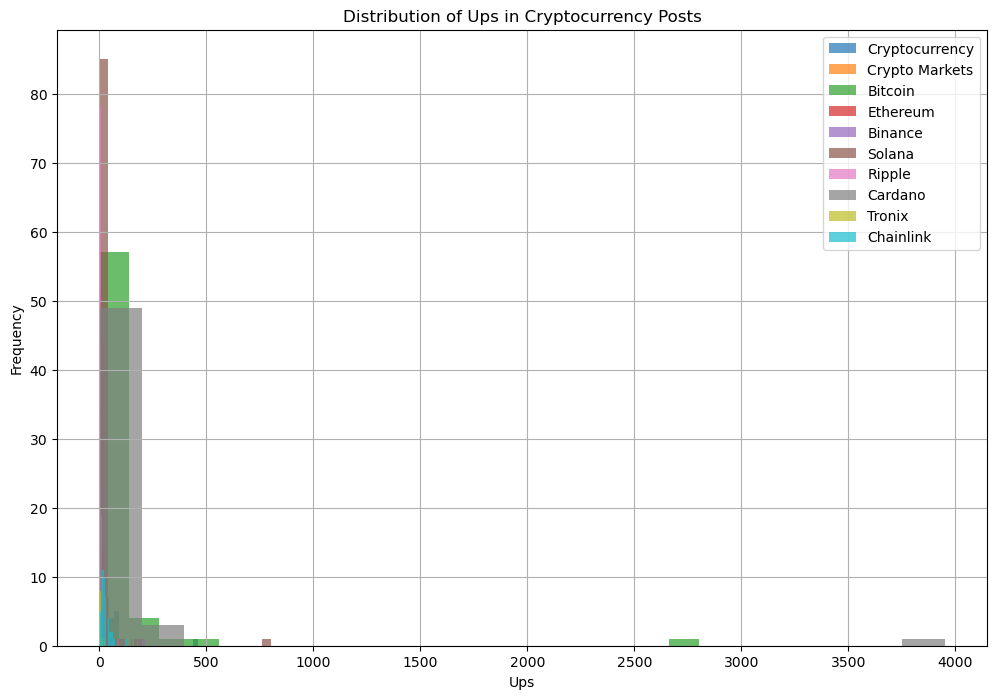

In [24]:
# Define a function to plot distribution for all cryptocurrencies
def plot_distribution_all(dataframes, column, title_prefix):
    plt.figure(figsize=(12, 8))
    for name, df in dataframes.items():
        plt.hist(df[column], bins=20, alpha=0.7, label=name)

    plt.title(f'Distribution of {column.capitalize()} in Cryptocurrency Posts')
    plt.xlabel(column.capitalize())
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot distribution of upvotes and scores for all cryptocurrencies
plot_distribution_all({
    'Cryptocurrency': cryptocurrency,
    'Crypto Markets': cryptomarkets,
    'Bitcoin': bitcoin,
    'Ethereum': eth,
    'Binance': binance,
    'Solana': solana,
    'Ripple': ripple,
    'Cardano': cardano,
    'Tronix': tronix,
    'Chainlink': chainlink
}, 'ups', 'Distribution of Upvotes')


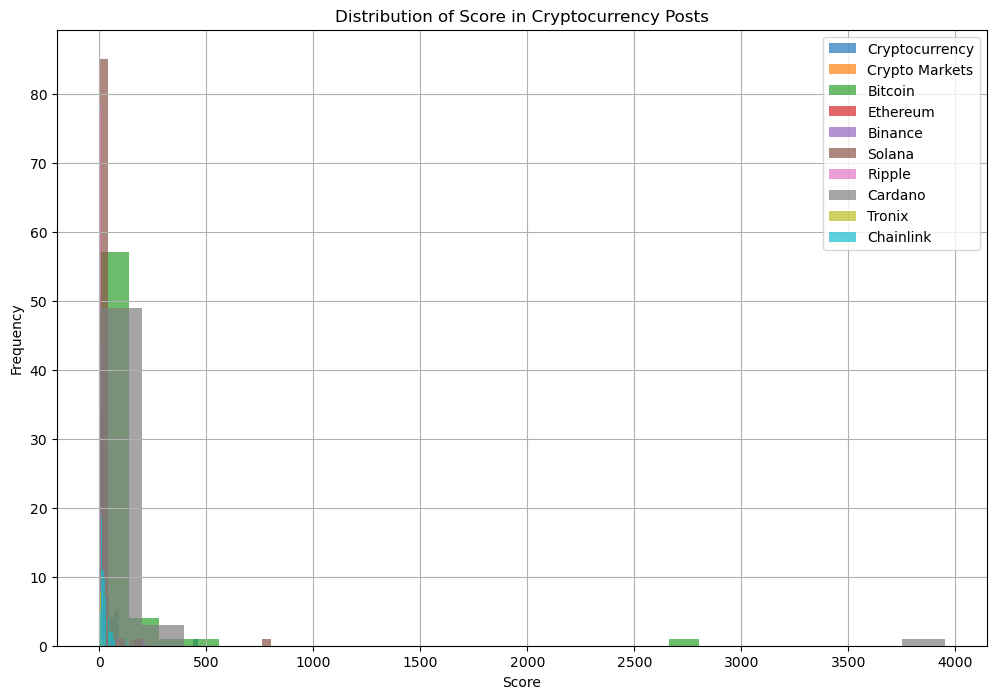

In [25]:
plot_distribution_all({
    'Cryptocurrency': cryptocurrency,
    'Crypto Markets': cryptomarkets,
    'Bitcoin': bitcoin,
    'Ethereum': eth,
    'Binance': binance,
    'Solana': solana,
    'Ripple': ripple,
    'Cardano': cardano,
    'Tronix': tronix,
    'Chainlink': chainlink
}, 'score', 'Distribution of Scores')

In [26]:
# Function to tokenize and remove stop words
def tokenize_and_remove_stopwords(text):
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word.lower() for word in tokens if word.isalnum() and word.lower() not in stop_words]
    return filtered_tokens

# Function to calculate word frequency for a DataFrame
def word_frequency(df, name):
    # Tokenize and remove stopwords for each post body
    tokenized_bodies = df['body'].apply(tokenize_and_remove_stopwords)
    # Flatten the list of tokenized words
    flattened_tokens = [word for sublist in tokenized_bodies for word in sublist]
    # Count the frequency of each word
    word_freq = Counter(flattened_tokens)
    # Sort the word frequency dictionary by frequency
    sorted_word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))
    
    # Print the most common words
    print(f"Top 10 most common words in {name}:")
    for word, freq in list(sorted_word_freq.items())[:10]:
        print(f"{word}: {freq}")
    print()

# Perform word frequency analysis for each cryptocurrency
word_frequency(cryptocurrency, "Cryptocurrency")
word_frequency(cryptomarkets, "Crypto Markets")
word_frequency(bitcoin, "Bitcoin")
word_frequency(eth, "Ethereum")
word_frequency(binance, "Binance")
word_frequency(solana, "Solana")
word_frequency(ripple, "Ripple")
word_frequency(cardano, "Cardano")
word_frequency(tronix, "Tronix")
word_frequency(chainlink, "Chainlink")

Top 10 most common words in Cryptocurrency:
https: 143
amp: 97
crypto: 64
discussion: 39
use: 34
share: 31
one: 31
bitcoin: 27
new: 26
time: 25

Top 10 most common words in Crypto Markets:
https: 32
crypto: 24
amp: 23
market: 17
coin: 16
like: 16
privacy: 16
would: 14
bitcoin: 14
projects: 13

Top 10 most common words in Bitcoin:
bitcoin: 163
https: 162
btc: 47
wallet: 34
http: 32
amp: 29
money: 26
people: 21
use: 20
would: 20

Top 10 most common words in Ethereum:
https: 84
amp: 73
eth: 71
ethereum: 49
wallet: 42
transaction: 34
crypto: 34
get: 24
users: 22
new: 21

Top 10 most common words in Binance:
amp: 846
please: 780
case: 780
support: 390
us: 390
help: 390
id: 390
withdrawal: 390
issues: 390
https: 327

Top 10 most common words in Solana:
gt: 325
https: 288
solana: 151
amp: 148
transactions: 84
transaction: 67
new: 47
wallet: 45
like: 38
token: 31

Top 10 most common words in Ripple:
amp: 245
https: 137
gt: 123
discord: 116
x200b: 96
xrp: 86
2: 81
3: 78
xrplounge: 77
1: 77

Top

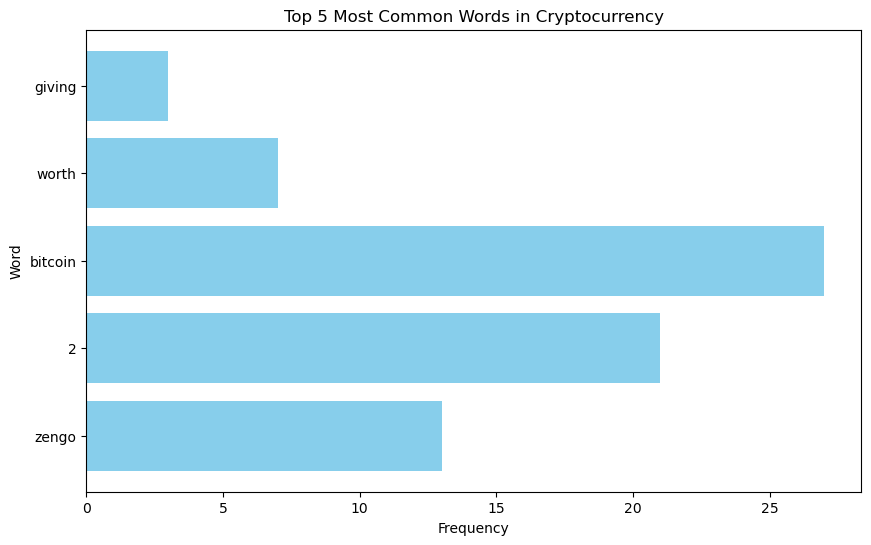

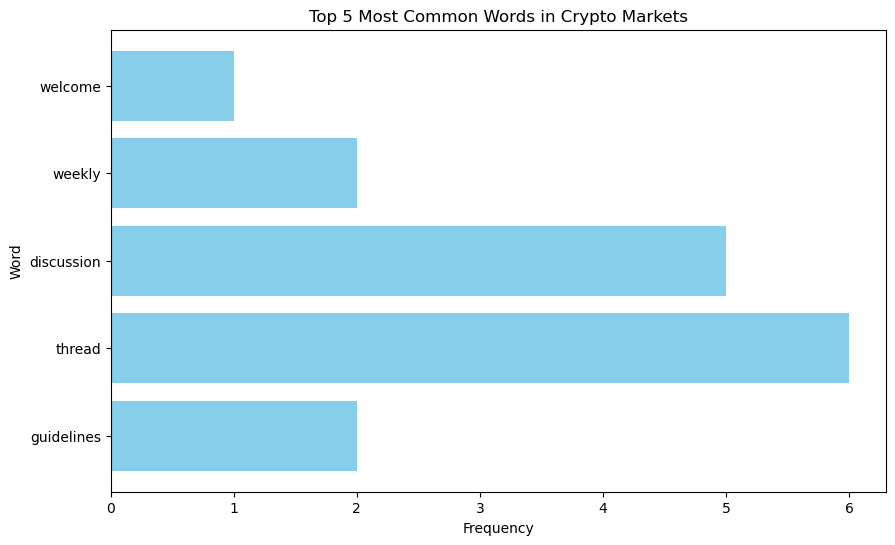

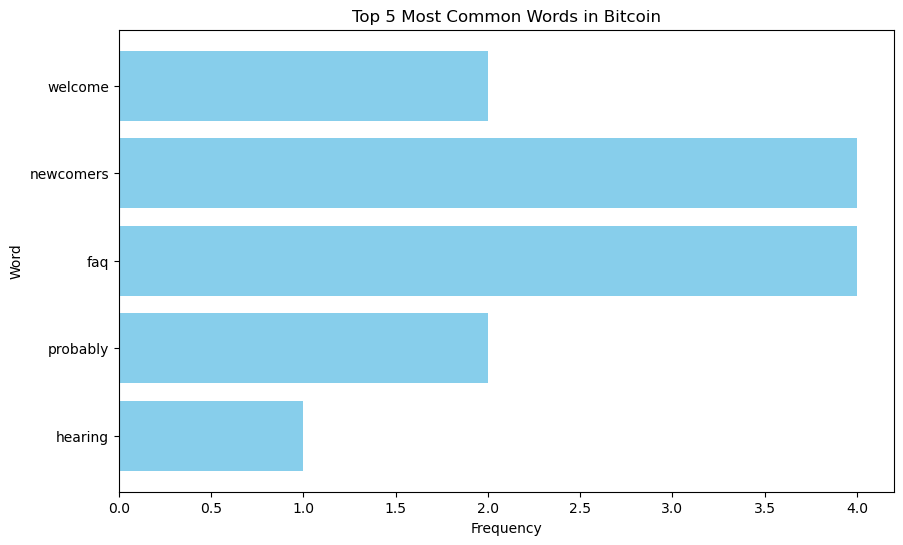

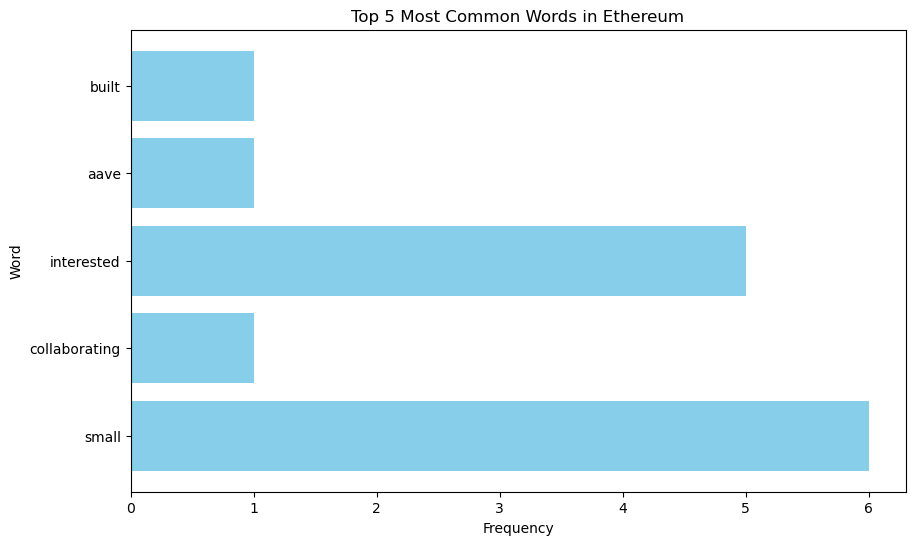

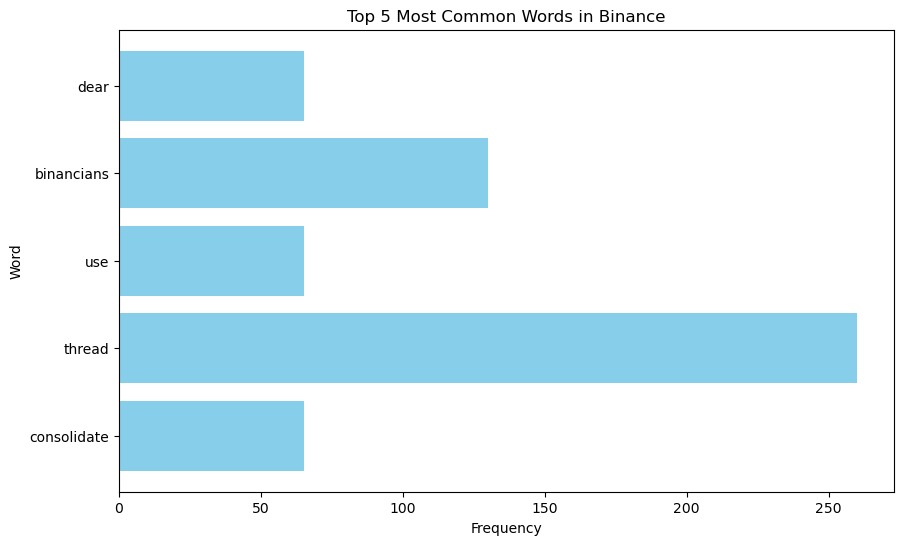

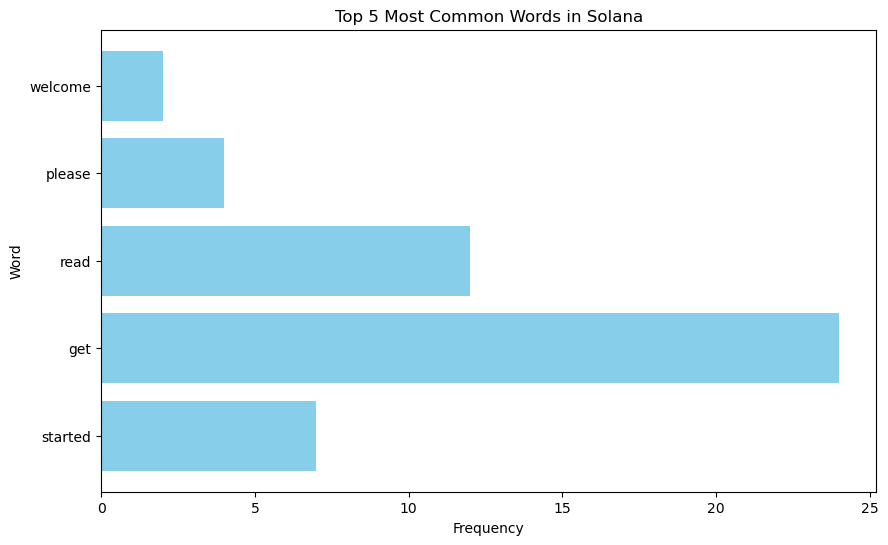

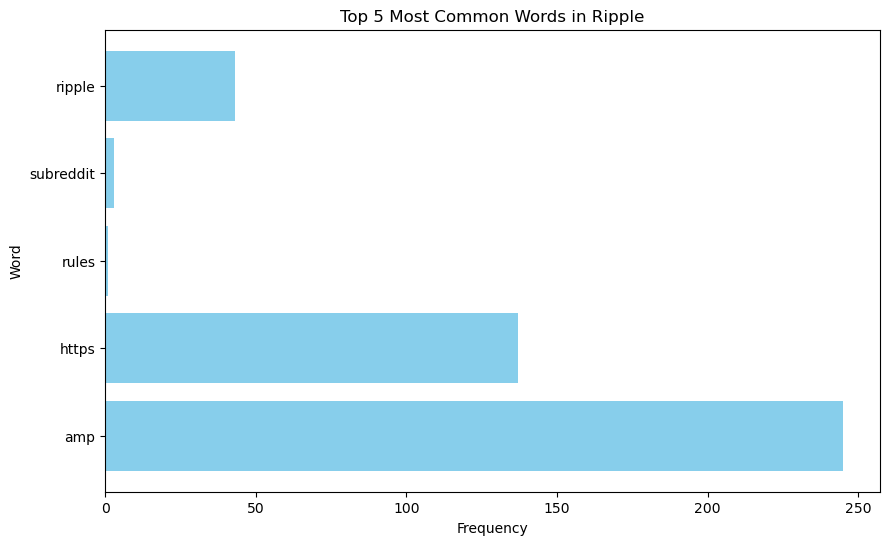

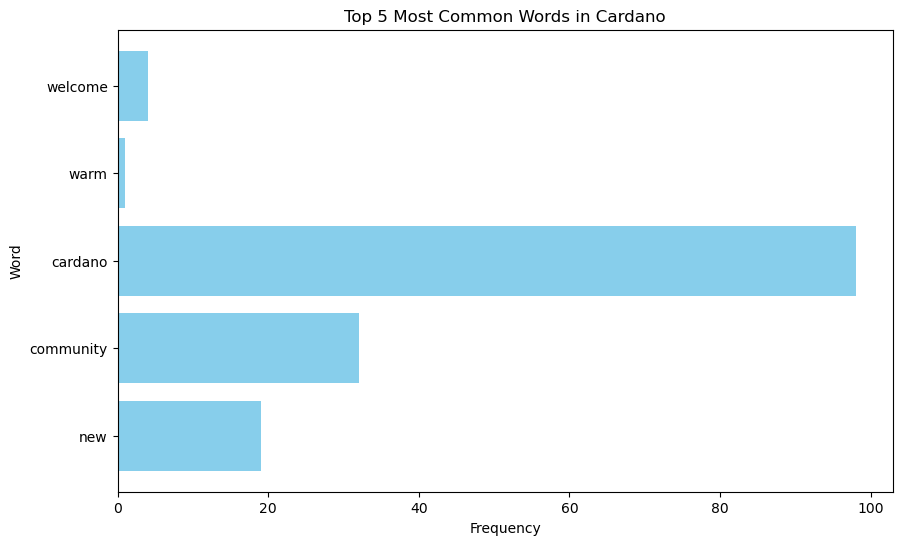

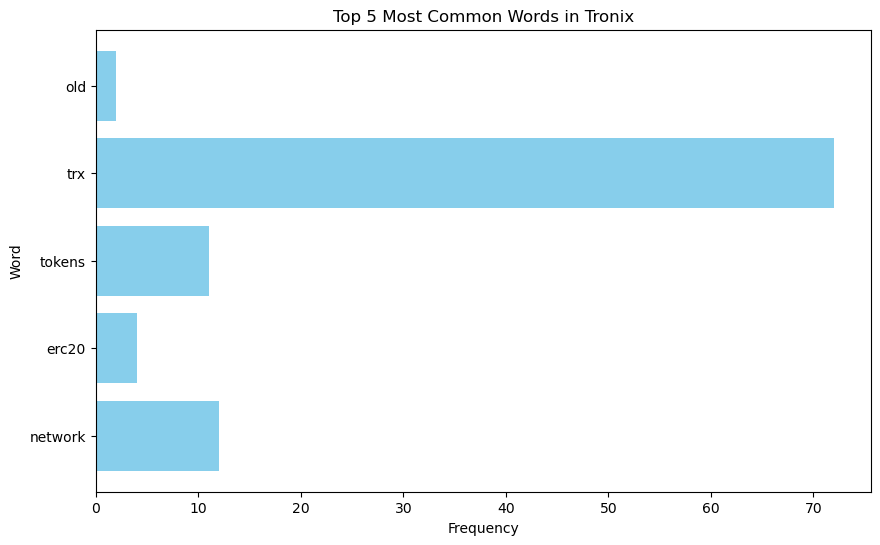

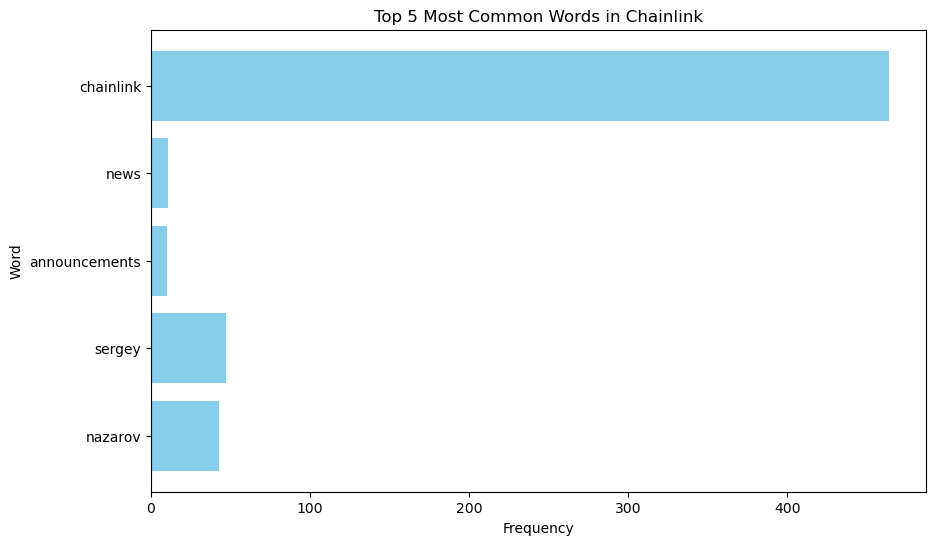

In [27]:
# Function to plot word frequency for the top N words
def plot_word_frequency(word_freq, name, top_n=5):
    top_words = list(word_freq.keys())[:top_n]
    top_freqs = list(word_freq.values())[:top_n]

    plt.figure(figsize=(10, 6))
    plt.barh(top_words, top_freqs, color='skyblue')
    plt.gca().invert_yaxis()  # Invert y-axis to have the most common words at the top
    plt.title(f'Top {top_n} Most Common Words in {name}')
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.show()
    
# Calculate word frequency for each cryptocurrency
word_freq_cryptocurrency = Counter(tokenize_and_remove_stopwords(" ".join(cryptocurrency['body'])))
word_freq_cryptomarkets = Counter(tokenize_and_remove_stopwords(" ".join(cryptomarkets['body'])))
word_freq_bitcoin = Counter(tokenize_and_remove_stopwords(" ".join(bitcoin['body'])))
word_freq_eth = Counter(tokenize_and_remove_stopwords(" ".join(eth['body'])))
word_freq_binance = Counter(tokenize_and_remove_stopwords(" ".join(binance['body'])))
word_freq_solana = Counter(tokenize_and_remove_stopwords(" ".join(solana['body'])))
word_freq_ripple = Counter(tokenize_and_remove_stopwords(" ".join(ripple['body'])))
word_freq_cardano = Counter(tokenize_and_remove_stopwords(" ".join(cardano['body'])))
word_freq_tronix = Counter(tokenize_and_remove_stopwords(" ".join(tronix['body'])))
word_freq_chainlink = Counter(tokenize_and_remove_stopwords(" ".join(chainlink['body'])))

# Plot top 5 word frequency for each cryptocurrency
plot_word_frequency(word_freq_cryptocurrency, "Cryptocurrency", top_n=5)
plot_word_frequency(word_freq_cryptomarkets, "Crypto Markets", top_n=5)
plot_word_frequency(word_freq_bitcoin, "Bitcoin", top_n=5)
plot_word_frequency(word_freq_eth, "Ethereum", top_n=5)
plot_word_frequency(word_freq_binance, "Binance", top_n=5)
plot_word_frequency(word_freq_solana, "Solana", top_n=5)
plot_word_frequency(word_freq_ripple, "Ripple", top_n=5)
plot_word_frequency(word_freq_cardano, "Cardano", top_n=5)
plot_word_frequency(word_freq_tronix, "Tronix", top_n=5)
plot_word_frequency(word_freq_chainlink, "Chainlink", top_n=5)


In [28]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment scores for each post body
def calculate_sentiment_scores(df):
    sentiment_scores = df['body'].apply(lambda x: analyzer.polarity_scores(x))
    return sentiment_scores

# Calculate sentiment scores for each cryptocurrency
sentiment_scores_cryptocurrency = calculate_sentiment_scores(cryptocurrency)
sentiment_scores_cryptomarkets = calculate_sentiment_scores(cryptomarkets)
sentiment_scores_bitcoin = calculate_sentiment_scores(bitcoin)
sentiment_scores_eth = calculate_sentiment_scores(eth)
sentiment_scores_binance = calculate_sentiment_scores(binance)
sentiment_scores_solana = calculate_sentiment_scores(solana)
sentiment_scores_ripple = calculate_sentiment_scores(ripple)
sentiment_scores_cardano = calculate_sentiment_scores(cardano)
sentiment_scores_tronix = calculate_sentiment_scores(tronix)
sentiment_scores_chainlink = calculate_sentiment_scores(chainlink)

# Function to summarize sentiment scores
def summarize_sentiment_scores(sentiment_scores, name):
    positive_count = sum(1 for score in sentiment_scores if score['compound'] > 0)
    neutral_count = sum(1 for score in sentiment_scores if score['compound'] == 0)
    negative_count = sum(1 for score in sentiment_scores if score['compound'] < 0)
    total_count = len(sentiment_scores)

    print(f"Sentiment Analysis for {name}:")
    print(f"Positive: {positive_count}/{total_count} ({(positive_count/total_count)*100:.2f}%)")
    print(f"Neutral: {neutral_count}/{total_count} ({(neutral_count/total_count)*100:.2f}%)")
    print(f"Negative: {negative_count}/{total_count} ({(negative_count/total_count)*100:.2f}%)")

# Summarize sentiment scores for each cryptocurrency
summarize_sentiment_scores(sentiment_scores_cryptocurrency, "Cryptocurrency")
summarize_sentiment_scores(sentiment_scores_cryptomarkets, "Crypto Markets")
summarize_sentiment_scores(sentiment_scores_bitcoin, "Bitcoin")
summarize_sentiment_scores(sentiment_scores_eth, "Ethereum")
summarize_sentiment_scores(sentiment_scores_binance, "Binance")
summarize_sentiment_scores(sentiment_scores_solana, "Solana")
summarize_sentiment_scores(sentiment_scores_ripple, "Ripple")
summarize_sentiment_scores(sentiment_scores_cardano, "Cardano")
summarize_sentiment_scores(sentiment_scores_tronix, "Tronix")
summarize_sentiment_scores(sentiment_scores_chainlink, "Chainlink")

Sentiment Analysis for Cryptocurrency:
Positive: 41/52 (78.85%)
Neutral: 2/52 (3.85%)
Negative: 9/52 (17.31%)
Sentiment Analysis for Crypto Markets:
Positive: 28/36 (77.78%)
Neutral: 0/36 (0.00%)
Negative: 8/36 (22.22%)
Sentiment Analysis for Bitcoin:
Positive: 45/64 (70.31%)
Neutral: 9/64 (14.06%)
Negative: 10/64 (15.62%)
Sentiment Analysis for Ethereum:
Positive: 59/74 (79.73%)
Neutral: 5/74 (6.76%)
Negative: 10/74 (13.51%)
Sentiment Analysis for Binance:
Positive: 66/84 (78.57%)
Neutral: 0/84 (0.00%)
Negative: 18/84 (21.43%)
Sentiment Analysis for Solana:
Positive: 59/89 (66.29%)
Neutral: 5/89 (5.62%)
Negative: 25/89 (28.09%)
Sentiment Analysis for Ripple:
Positive: 37/91 (40.66%)
Neutral: 11/91 (12.09%)
Negative: 43/91 (47.25%)
Sentiment Analysis for Cardano:
Positive: 45/53 (84.91%)
Neutral: 3/53 (5.66%)
Negative: 5/53 (9.43%)
Sentiment Analysis for Tronix:
Positive: 44/75 (58.67%)
Neutral: 10/75 (13.33%)
Negative: 21/75 (28.00%)
Sentiment Analysis for Chainlink:
Positive: 42/64 (

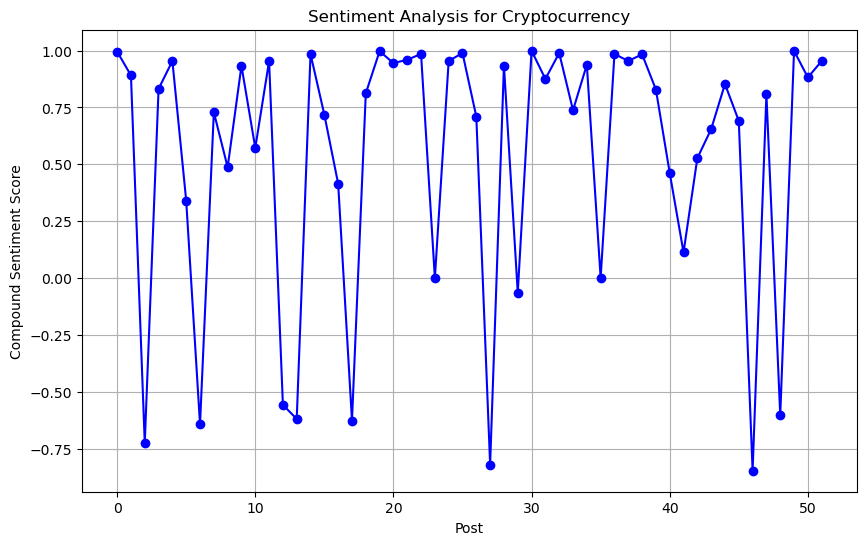

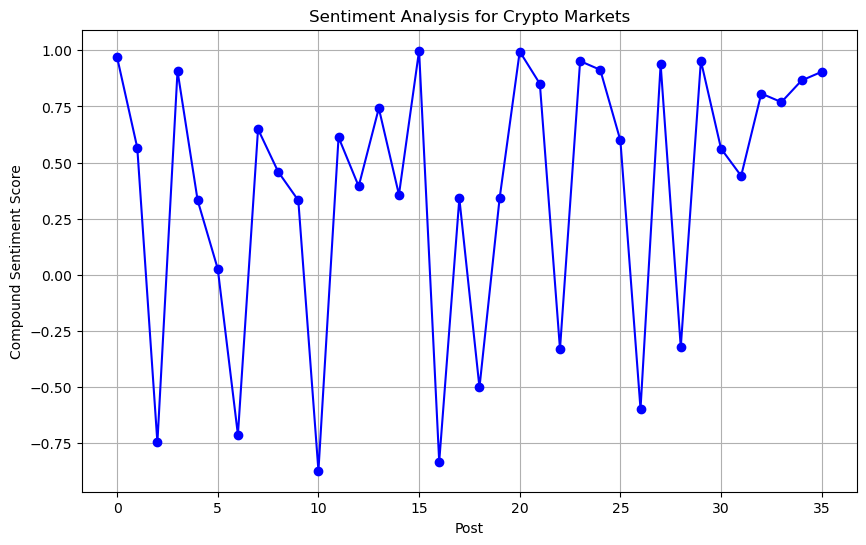

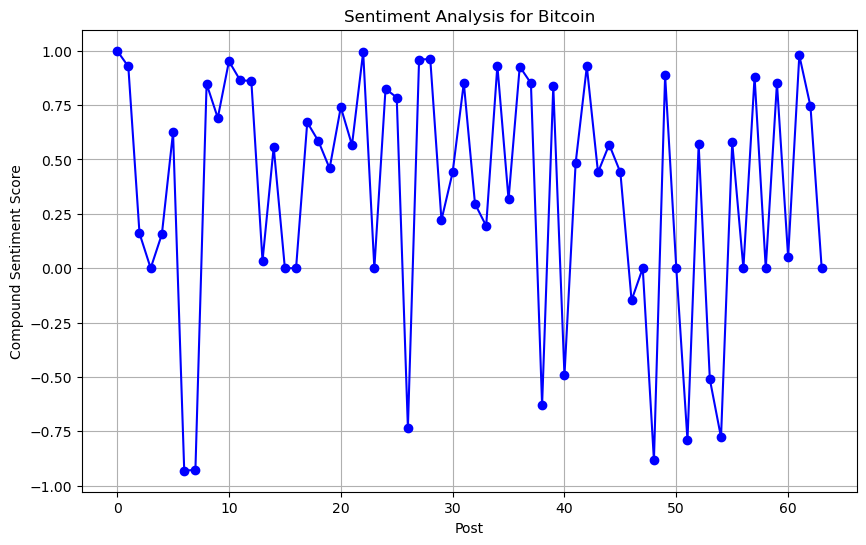

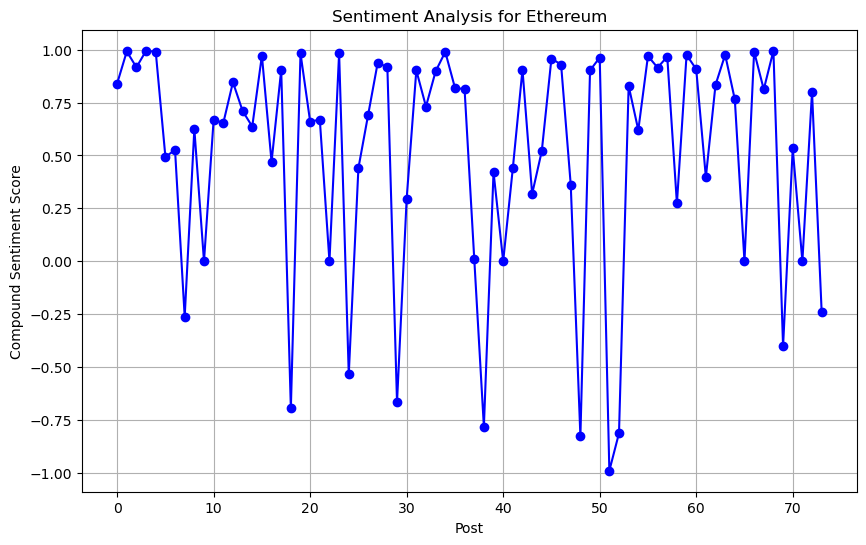

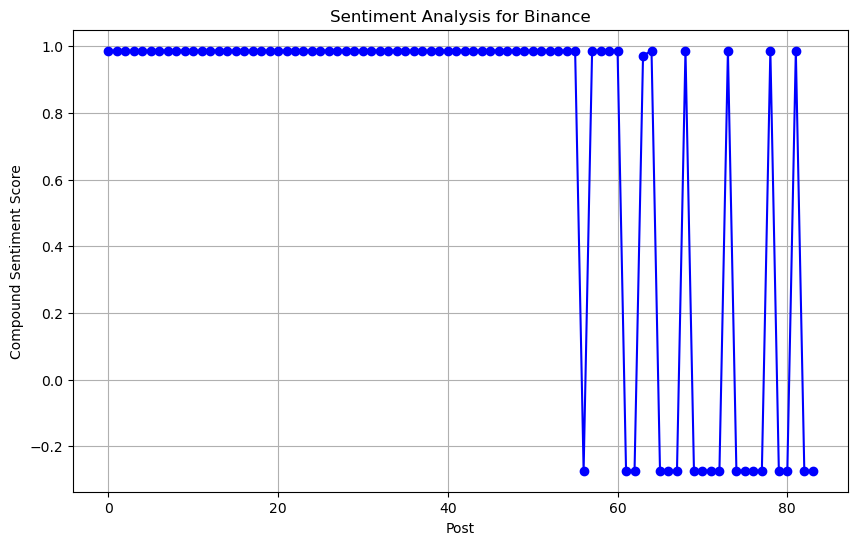

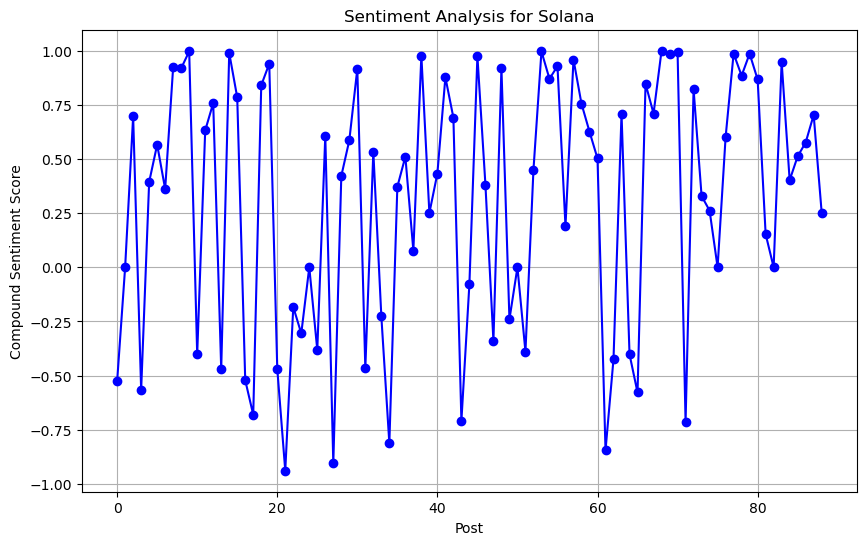

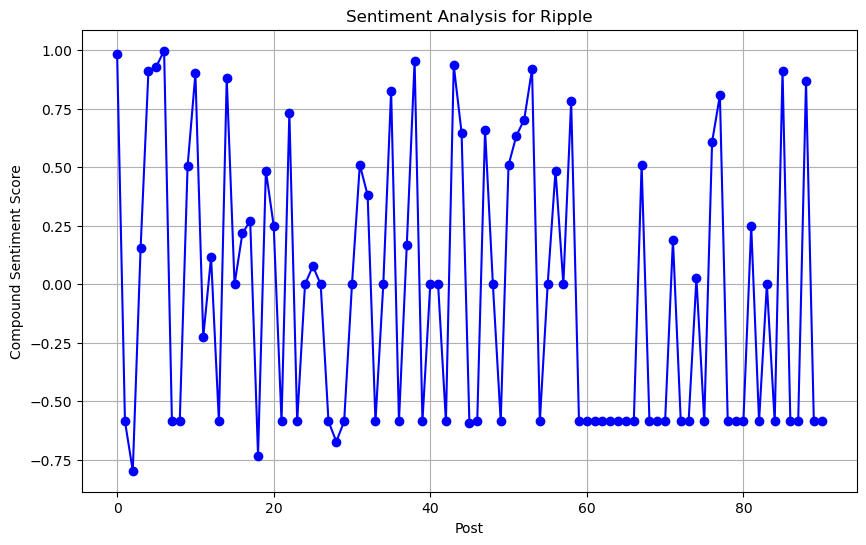

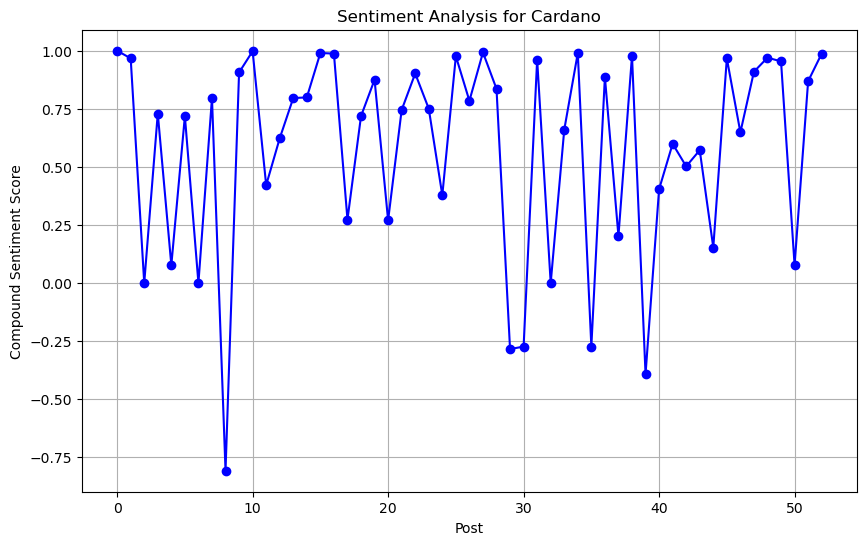

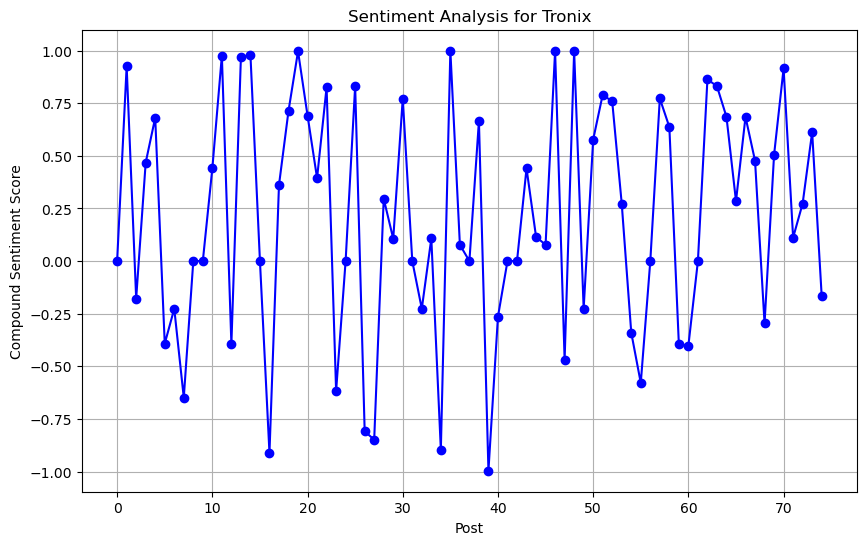

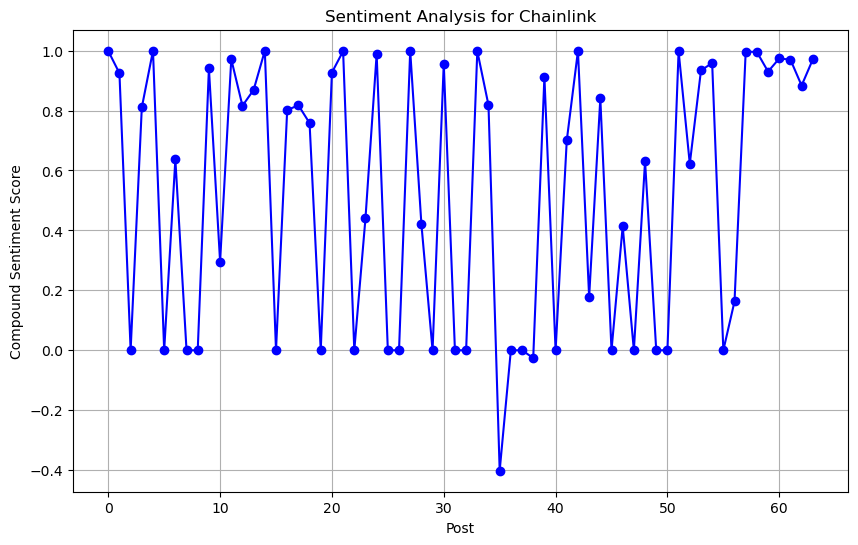

In [29]:
# Function to plot sentiment scores for a cryptocurrency
def plot_sentiment_scores(sentiment_scores, name):
    # Extract compound scores
    compound_scores = [score['compound'] for score in sentiment_scores]
    # Plot compound scores
    plt.figure(figsize=(10, 6))
    plt.plot(compound_scores, marker='o', linestyle='-', color='b')
    plt.title(f'Sentiment Analysis for {name}')
    plt.xlabel('Post')
    plt.ylabel('Compound Sentiment Score')
    plt.grid(True)
    plt.show()

# Plot sentiment scores for each cryptocurrency
plot_sentiment_scores(sentiment_scores_cryptocurrency, "Cryptocurrency")
plot_sentiment_scores(sentiment_scores_cryptomarkets, "Crypto Markets")
plot_sentiment_scores(sentiment_scores_bitcoin, "Bitcoin")
plot_sentiment_scores(sentiment_scores_eth, "Ethereum")
plot_sentiment_scores(sentiment_scores_binance, "Binance")
plot_sentiment_scores(sentiment_scores_solana, "Solana")
plot_sentiment_scores(sentiment_scores_ripple, "Ripple")
plot_sentiment_scores(sentiment_scores_cardano, "Cardano")
plot_sentiment_scores(sentiment_scores_tronix, "Tronix")
plot_sentiment_scores(sentiment_scores_chainlink, "Chainlink")

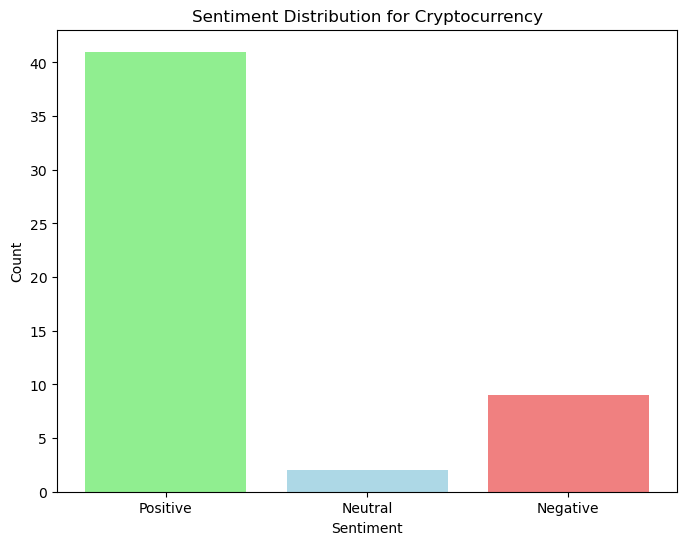

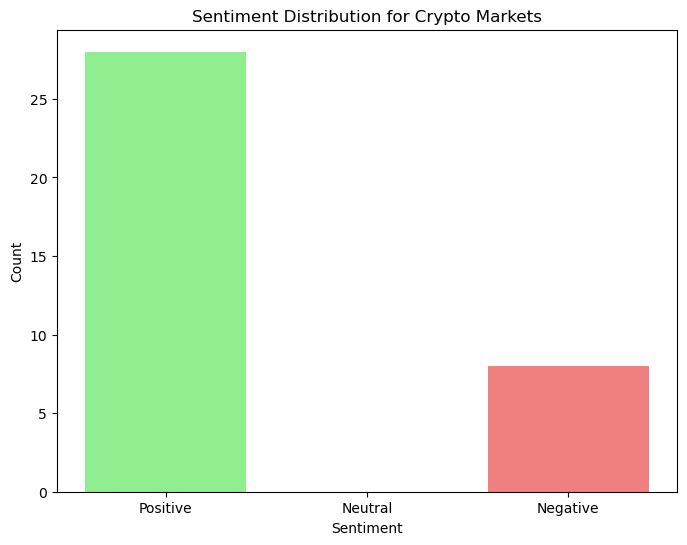

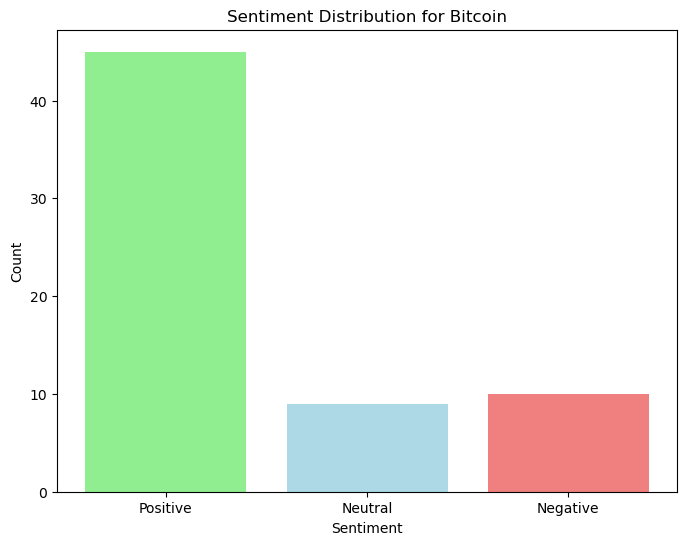

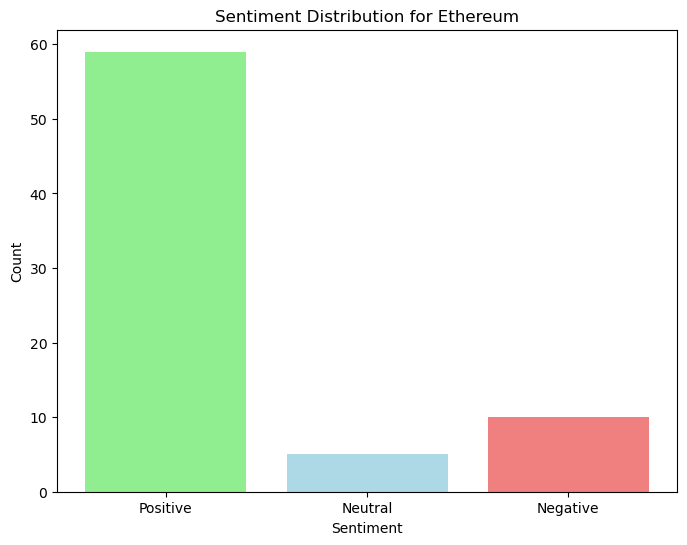

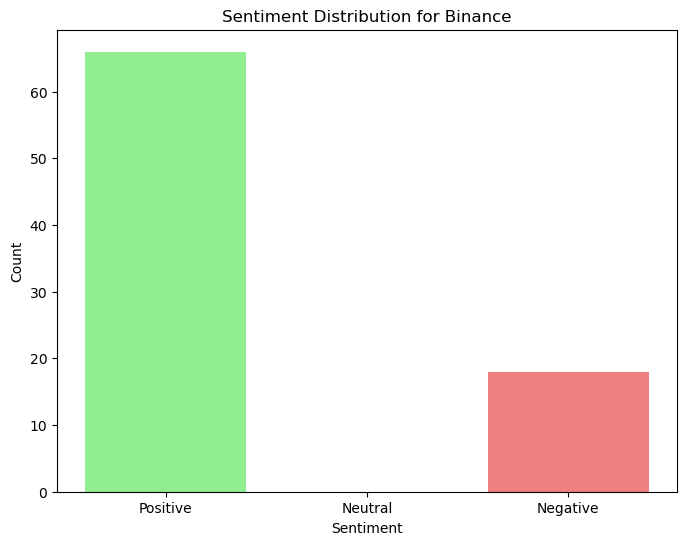

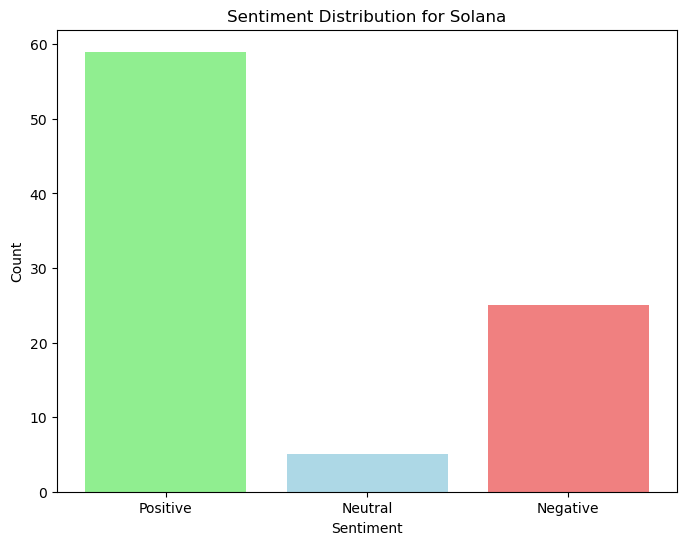

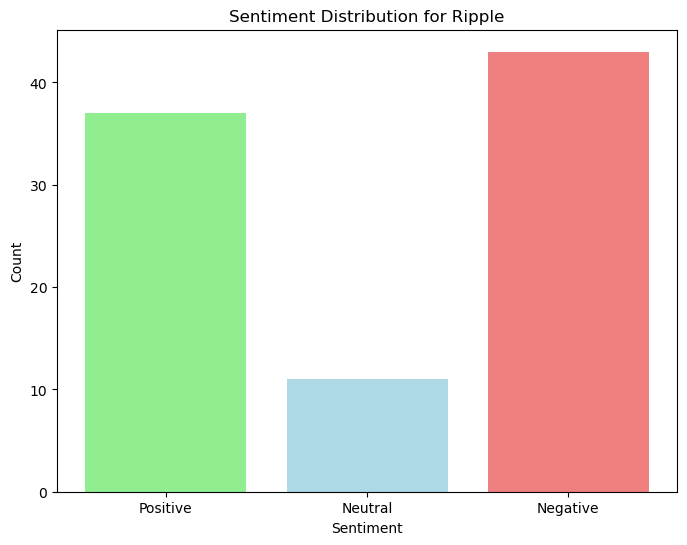

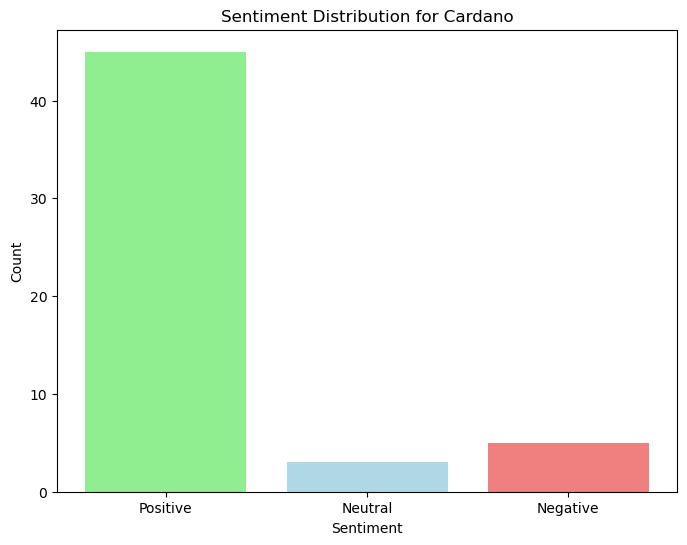

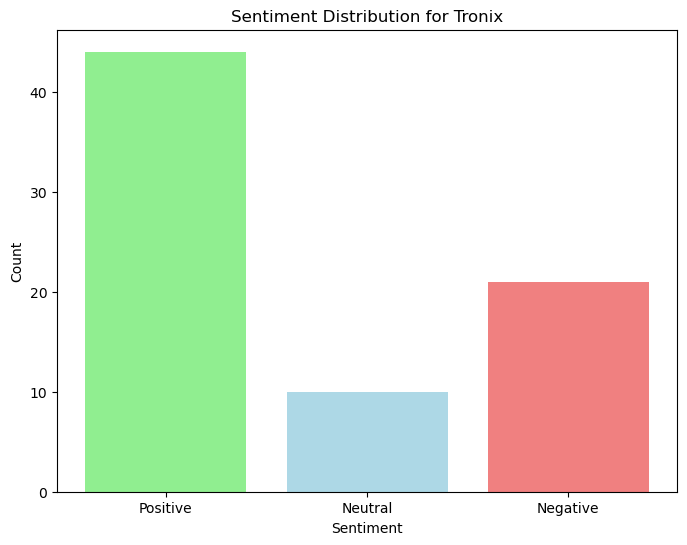

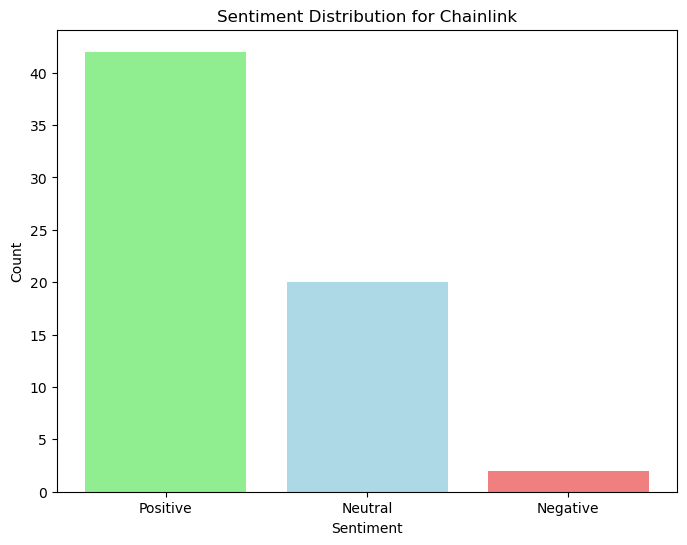

In [30]:
# Function to plot sentiment distribution for a cryptocurrency
def plot_sentiment_distribution(sentiment_scores, name):
    # Initialize counts
    positive_count = sum(1 for score in sentiment_scores if score['compound'] > 0)
    neutral_count = sum(1 for score in sentiment_scores if score['compound'] == 0)
    negative_count = sum(1 for score in sentiment_scores if score['compound'] < 0)
    
    # Plot
    labels = ['Positive', 'Neutral', 'Negative']
    counts = [positive_count, neutral_count, negative_count]
    colors = ['lightgreen', 'lightblue', 'lightcoral']

    plt.figure(figsize=(8, 6))
    plt.bar(labels, counts, color=colors)
    plt.title(f'Sentiment Distribution for {name}')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

# Plot sentiment distribution for each cryptocurrency
plot_sentiment_distribution(sentiment_scores_cryptocurrency, "Cryptocurrency")
plot_sentiment_distribution(sentiment_scores_cryptomarkets, "Crypto Markets")
plot_sentiment_distribution(sentiment_scores_bitcoin, "Bitcoin")
plot_sentiment_distribution(sentiment_scores_eth, "Ethereum")
plot_sentiment_distribution(sentiment_scores_binance, "Binance")
plot_sentiment_distribution(sentiment_scores_solana, "Solana")
plot_sentiment_distribution(sentiment_scores_ripple, "Ripple")
plot_sentiment_distribution(sentiment_scores_cardano, "Cardano")
plot_sentiment_distribution(sentiment_scores_tronix, "Tronix")
plot_sentiment_distribution(sentiment_scores_chainlink, "Chainlink")

## Combining the Data

In [31]:
cryptocurrency = reddit_api.get_crypto_curr_data()
cryptomarkets = reddit_api.get_crypto_markets_data()
bitcoin = reddit_api.get_bitcoin_data()
eth= reddit_api.get_eth_data()
binance = reddit_api.get_binance_data()
solana = reddit_api.get_solana_data()
ripple = reddit_api.get_ripple_data()
cardano = reddit_api.get_cardano_data()
tronix = reddit_api.get_tronix_data()
chainlink = reddit_api.get_chainlink_data()

In [32]:
combined_df = pd.concat([cryptocurrency,cryptomarkets,bitcoin,
                             eth, binance, solana,
                             ripple,cardano, tronix,chainlink
                              ], axis=0)

In [33]:
combined_df.head(5)

,approved_date,thread_id,subreddit,title,body,upvote_ratio,ups,downs,score
0,None,t3 _ 1dbsf1d,CryptoCurrency,"Crypto inheritance: We’re giving $1,000 of Bit...","**We’re giving $1,000 worth of Bitcoin into 2 ...",0.42,0,0,0
1,None,t3 _ 1ddq3hq,CryptoCurrency,We're the authors of Resistance Money: A Philo...,Hi r/cryptocurrency! We -- u/wrathius and u/ny...,0.56,9,0,9
2,None,t3 _ 1de2s8p,CryptoCurrency,"In a Bizarre Statement, Trump Says Bitcoin Sho...",,0.84,450,0,450
3,None,t3 _ 1de7vs6,CryptoCurrency,Bitcoin ticks up as CPI comes in lower than ex...,,0.93,67,0,67
4,None,t3 _ 1de2zgc,CryptoCurrency,"ETH hitting an all-time high against BTC, 7 ye...",,0.68,56,0,56


In [34]:
combined_df["cleaned_body"] = combined_df['body'].apply(tokenize_and_remove_stopwords)
    # Flatten the list of tokenized words
#flattened_tokens = [word for sublist in tokenized_bodies for word in sublist]
combined_df.head(5)

,approved_date,thread_id,subreddit,title,body,upvote_ratio,ups,downs,score,cleaned_body
0,None,t3 _ 1dbsf1d,CryptoCurrency,"Crypto inheritance: We’re giving $1,000 of Bit...","**We’re giving $1,000 worth of Bitcoin into 2 ...",0.42,0,0,0,"[giving, worth, bitcoin, 2, zengo, pro, accoun..."
1,None,t3 _ 1ddq3hq,CryptoCurrency,We're the authors of Resistance Money: A Philo...,Hi r/cryptocurrency! We -- u/wrathius and u/ny...,0.56,9,0,9,"[hi, three, philosophy, professors, wrote, aca..."
2,None,t3 _ 1de2s8p,CryptoCurrency,"In a Bizarre Statement, Trump Says Bitcoin Sho...",,0.84,450,0,450,[]
3,None,t3 _ 1de7vs6,CryptoCurrency,Bitcoin ticks up as CPI comes in lower than ex...,,0.93,67,0,67,[]
4,None,t3 _ 1de2zgc,CryptoCurrency,"ETH hitting an all-time high against BTC, 7 ye...",,0.68,56,0,56,[]


In [35]:
# List of columns to clean
columns_to_clean = ['body', 'title', 'thread_id']

# Apply the cleaning function to each column and create new cleaned columns
for col in columns_to_clean:
    combined_df[f'cleaned_{col}'] = combined_df[col].apply(tokenize_and_remove_stopwords)

# Display the first 5 rows of the updated DataFrame
combined_df.head(5)


,approved_date,thread_id,subreddit,title,body,upvote_ratio,ups,downs,score,cleaned_body,cleaned_title,cleaned_thread_id
0,None,t3 _ 1dbsf1d,CryptoCurrency,"Crypto inheritance: We’re giving $1,000 of Bit...","**We’re giving $1,000 worth of Bitcoin into 2 ...",0.42,0,0,0,"[giving, worth, bitcoin, 2, zengo, pro, accoun...","[crypto, inheritance, giving, bitcoin, zengo, ...","[t3, 1dbsf1d]"
1,None,t3 _ 1ddq3hq,CryptoCurrency,We're the authors of Resistance Money: A Philo...,Hi r/cryptocurrency! We -- u/wrathius and u/ny...,0.56,9,0,9,"[hi, three, philosophy, professors, wrote, aca...","[authors, resistance, money, philosophical, ca...","[t3, 1ddq3hq]"
2,None,t3 _ 1de2s8p,CryptoCurrency,"In a Bizarre Statement, Trump Says Bitcoin Sho...",,0.84,450,0,450,[],"[bizarre, statement, trump, says, bitcoin, min...","[t3, 1de2s8p]"
3,None,t3 _ 1de7vs6,CryptoCurrency,Bitcoin ticks up as CPI comes in lower than ex...,,0.93,67,0,67,[],"[bitcoin, ticks, cpi, comes, lower, expected]","[t3, 1de7vs6]"
4,None,t3 _ 1de2zgc,CryptoCurrency,"ETH hitting an all-time high against BTC, 7 ye...",,0.68,56,0,56,[],"[eth, hitting, high, btc, 7, years, ago, 2017,...","[t3, 1de2zgc]"


## Defining the problem:
## Topic Modeling:

- Objective: Identify and understand the main topics discussed in cryptocurrency-related subreddits.
- Outcome: Discover latent topics and trends within the discussions, which could help in understanding community interests and sentiments.

## EDA

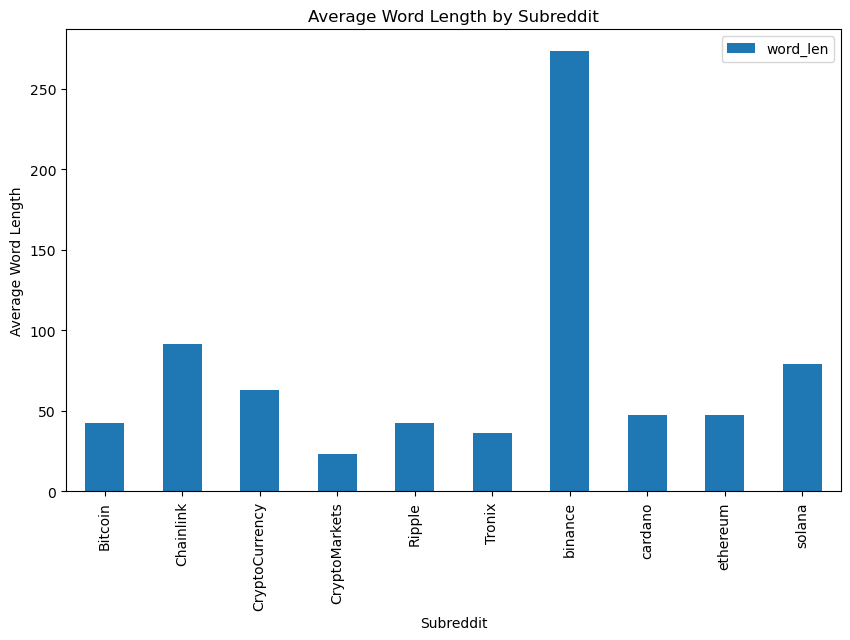

In [36]:
# Join the tokens in the 'cleaned_body' column back into strings
combined_df['cleaned_body_str'] = combined_df['cleaned_body'].apply(lambda x: ' '.join(x))

# Calculate the word length
combined_df['word_len'] = combined_df['cleaned_body_str'].apply(lambda x: len(x.split()))

# Plot the average word length by subreddit
combined_df.groupby('subreddit').agg({'word_len': 'mean'}).plot.bar(figsize=(10,6))
plt.xlabel('Subreddit')
plt.ylabel('Average Word Length')
plt.title('Average Word Length by Subreddit')
plt.show()


## Text Vectorization
We'll convert the cleaned text data into numerical vectors using TF-IDF and Count Vectorizer.

In [37]:
# Define stopwords
stop_words = list(stopwords.words('english'))

# Perform Count Vectorization
count_text_vectorizer = CountVectorizer(stop_words=stop_words, min_df=5, max_df=0.7)
count_text_vectors = count_text_vectorizer.fit_transform(combined_df['cleaned_body_str'])

# Perform TF-IDF Vectorization
tfidf_text_vectorizer = TfidfVectorizer(stop_words=stop_words, min_df=5, max_df=0.7)
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(combined_df['cleaned_body_str'])

# Print the shape of the vectors
print("Count Vector Shape:", count_text_vectors.shape)
print("TF-IDF Vector Shape:", tfidf_text_vectors.shape)

Count Vector Shape: (1011, 1618)
TF-IDF Vector Shape: (1011, 1618)


## Applying unsupervised learning models:
Apply NMF, LSA, and LDA Models

## NMF Model

In [38]:
# Fit the NMF model
nmf_text_model = NMF(n_components=5, random_state=314)
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)
H_text_matrix = nmf_text_model.components_

# Display topics
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1]  # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print(" %s (%2.2f)" % (features[largest[i]], abs(words[largest[i]]*100.0/total)))

display_topics(nmf_text_model, tfidf_text_vectorizer.get_feature_names_out())


Topic 00
 case (2.79)
 please (2.63)
 amp (2.31)
 id (1.51)
 withdrawal (1.50)

Topic 01
 gt (7.17)
 discord (6.22)
 amp (5.66)
 xrplounge (4.45)
 x200b (4.09)

Topic 02
 https (9.02)
 amp (7.01)
 chainlink (2.51)
 gt (0.80)
 data (0.75)

Topic 03
 drop (27.61)
 thoughts (26.66)
 things (25.32)
 planning (0.33)
 curious (0.28)

Topic 04
 wallet (1.34)
 eth (0.78)
 like (0.74)
 bitcoin (0.72)
 trx (0.69)


## LSA Model

In [39]:
# Fit the LSA model
lsa_text_model = TruncatedSVD(n_components=5, random_state=314)
lsa_W_text_matrix = lsa_text_model.fit_transform(tfidf_text_vectors)
lsa_H_text_matrix = lsa_text_model.components_

# Display topics
display_topics(lsa_text_model, tfidf_text_vectorizer.get_feature_names_out())


Topic 00
 amp (2.94)
 case (1.93)
 please (1.85)
 https (1.61)
 id (1.04)

Topic 01
 gt (16.74)
 amp (14.83)
 discord (13.25)
 https (9.88)
 x200b (9.70)

Topic 02
 https (6.65)
 amp (2.18)
 chainlink (2.15)
 wallet (1.17)
 bitcoin (1.08)

Topic 03
 drop (15.59)
 thoughts (15.12)
 things (14.37)
 discord (0.71)
 wallet (0.61)

Topic 04
 wallet (1.56)
 eth (0.89)
 trx (0.85)
 like (0.84)
 would (0.80)


## LDA Model

In [40]:
# Fit the LDA model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
W_lda_matrix = lda_model.fit_transform(count_text_vectors)
H_lda_matrix = lda_model.components_

# Display topics
display_topics(lda_model, count_text_vectorizer.get_feature_names_out())


Topic 00
 wallet (1.71)
 bitcoin (1.36)
 like (1.16)
 crypto (1.13)
 get (0.83)

Topic 01
 gt (13.89)
 amp (9.07)
 discord (3.89)
 https (3.75)
 x200b (3.69)

Topic 02
 amp (3.10)
 please (2.88)
 case (2.82)
 help (1.43)
 support (1.43)

Topic 03
 https (9.18)
 amp (5.35)
 chainlink (3.31)
 blockchain (0.91)
 gt (0.90)

Topic 04
 https (3.76)
 transaction (2.54)
 transactions (2.47)
 solana (1.86)
 amp (1.22)


## Visualize the LDA Model using pyLDAvis


In [52]:
# Create the count vectorizer and fit_transform on the text
count_vectorizer = CountVectorizer(stop_words='english')
count_vectors = count_vectorizer.fit_transform(combined_df['cleaned_body_str'])

# Convert to gensim corpus
corpus = gensim.matutils.Sparse2Corpus(count_vectors, documents_columns=False)

# Create dictionary from count_vectorizer
id2word = gensim.corpora.Dictionary([count_vectorizer.get_feature_names_out()])

# Fit LDA model
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=id2word, passes=15, random_state=42)

# Visualize the topics
lda_display = gensimvis.prepare(lda_model, corpus, id2word)
pyLDAvis.display(lda_display)

/Users/aryasmc/.local/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Model Evaluation and Comparison

In [54]:
# Compute coherence score for LDA
lda_coherence_model = CoherenceModel(model=lda_model, texts=combined_df['cleaned_body'], dictionary=id2word, coherence='c_v')
lda_coherence = lda_coherence_model.get_coherence()
print(f'LDA Coherence Score: {lda_coherence}')


LDA Coherence Score: 0.49500284290373714


In [55]:
# Coherence Score for NMF Model
def get_top_words(model, feature_names, n_top_words):
    top_words = []
    for topic_idx, topic in enumerate(model.components_):
        top_words.append([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
    return top_words

# Get top words for NMF model
nmf_top_words = get_top_words(nmf_text_model, tfidf_text_vectorizer.get_feature_names_out(), 10)

# Create a dictionary and corpus based on the original texts
texts = combined_df['cleaned_body'].apply(lambda x: x if isinstance(x, list) else x.split())
dictionary = gensim.corpora.Dictionary(texts)

# Compute coherence score for NMF model
nmf_coherence_model = CoherenceModel(topics=nmf_top_words, texts=texts, dictionary=dictionary, coherence='c_v')
nmf_coherence = nmf_coherence_model.get_coherence()
print(f'NMF Coherence Score: {nmf_coherence}')

NMF Coherence Score: 0.5804628892843013


In [56]:
# Coherence Score for LSA Model
# Get top words for LSA model
lsa_top_words = get_top_words(lsa_text_model, tfidf_text_vectorizer.get_feature_names_out(), 10)

# Compute coherence score for LSA model
lsa_coherence_model = CoherenceModel(topics=lsa_top_words, texts=texts, dictionary=dictionary, coherence='c_v')
lsa_coherence = lsa_coherence_model.get_coherence()
print(f'LSA Coherence Score: {lsa_coherence}')

LSA Coherence Score: 0.5222055849012893


In [58]:
# Table of Coherence Score for each model
lda_coherence = 0.49500284290373714
nmf_coherence = 0.5804628892843013
lsa_coherence = 0.5222055849012893

# Create a DataFrame to display the coherence scores
coherence_scores = {
    'Model': ['LDA', 'NMF', 'LSA'],
    'Coherence Score': [round(lda_coherence, 2), round(nmf_coherence, 2), round(lsa_coherence, 2)]
}

coherence_df = pd.DataFrame(coherence_scores)

# Display the DataFrame
print(coherence_df)

  Model  Coherence Score
0   LDA             0.50
1   NMF             0.58
2   LSA             0.52


##### The analysis successfully identified and understood the main topics discussed in cryptocurrency-related subreddits. Applying NMF, LSA, and LDA models revealed latent topics and trends within the discussions. Among the models, NMF achieved the highest coherence score of 0.58, indicating the most coherent topics. These findings provide valuable insights into community interests and sentiments, facilitating a deeper understanding of the cryptocurrency discourse.